# –ò–∑—É—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –∏–∑ —Ñ–∞–π–ª–∞

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats as st


In [3]:
df = pd.read_csv("games.csv")
display(df)

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      Rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isna().mean().apply('{:.0%}'.format)

Name                0%
Platform            0%
Year_of_Release     2%
Genre               0%
NA_sales            0%
EU_sales            0%
JP_sales            0%
Other_sales         0%
Critic_Score       51%
User_Score         40%
Rating             40%
dtype: object

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df[df.duplicated(['Name','Platform','Year_of_Release'], keep=False)]

Name Platform  Year_of_Release   Genre  NA_sales  EU_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
659              NaN      GEN           1993.0     NaN      1.78      0.53   
14244            NaN      GEN           1993.0     NaN      0.00      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       JP_sales  Other_sales  Critic_Score User_Score Rating  
604        0.00         0.23          83.0        5.5      E  
659        0.00         0.08           NaN        NaN    NaN  
14244      0.03         0.00           NaN        NaN    NaN  
16230      0.00         0.00          83.0        5.5      E

In [9]:
df= df.drop_duplicates(subset=['Name','Platform','Year_of_Release'],keep='first')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16712 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16712 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8136 non-null   float64
 9   User_Score       10013 non-null  object 
 10  Rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<a name="0."></a> –û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö:

* <b>Name</b> ‚Äî –Ω–∞–∑–≤–∞–Ω–∏–µ –∏–≥—Ä—ã
* <b>Platform</b> ‚Äî  –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞
* <b>Year_of_Release</b> ‚Äî –≥–æ–¥ –≤—ã–ø—É—Å–∫–∞
* <b>Genre</b> ‚Äî –∂–∞–Ω—Ä –∏–≥—Ä—ã
* <b>NA_sales</b> ‚Äî –ø—Ä–æ–¥–∞–∂–∏ –≤ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ (–º–∏–ª–ª–∏–æ–Ω—ã –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∫–æ–ø–∏–π)
* <b>EU_sales</b> ‚Äî –ø—Ä–æ–¥–∞–∂–∏ –≤ –ï–≤—Ä–æ–ø–µ (–º–∏–ª–ª–∏–æ–Ω—ã –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∫–æ–ø–∏–π)
* <b>JP_sales</b> ‚Äî –ø—Ä–æ–¥–∞–∂–∏ –≤ –Ø–ø–æ–Ω–∏–∏ (–º–∏–ª–ª–∏–æ–Ω—ã –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∫–æ–ø–∏–π)
* <b>Other_sales</b> ‚Äî –ø—Ä–æ–¥–∞–∂–∏ –≤ –¥—Ä—É–≥–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö (–º–∏–ª–ª–∏–æ–Ω—ã –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∫–æ–ø–∏–π)
* <b>Critic_Score</b> ‚Äî –æ—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ (–º–∞–∫—Å–∏–º—É–º 100)
* <b>User_Score</b> ‚Äî –æ—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (–º–∞–∫—Å–∏–º—É–º 10)
* <b>Rating</b> ‚Äî —Ä–µ–π—Ç–∏–Ω–≥ –æ—Ç –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏ ESRB (–∞–Ω–≥–ª. Entertainment Software Rating Board). –≠—Ç–∞ –∞—Å—Å–æ—Ü–∏–∞—Ü–∏—è –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –∏–≥—Ä –∏ –ø—Ä–∏—Å–≤–∞–∏–≤–∞–µ—Ç –∏–º –ø–æ–¥—Ö–æ–¥—è—â—É—é –≤–æ–∑—Ä–∞—Å—Ç–Ω—É—é –∫–∞—Ç–µ–≥–æ—Ä–∏—é

**–í—ã–≤–æ–¥**


–û–∑–Ω–∞–∫–æ–º–∏–ª–∏—Å—å —Å –¥–∞–Ω–Ω—ã–º–∏ –∏ –∏–∑—É—á–∏–ª–∏ –∏—Ö —Å—Ç—Ä—É–∫—Ç—É—Ä—É. –í–∏–¥–∏–º, —á—Ç–æ —Ç—Ä–µ–±—É–µ—Ç—Å—è –∏–∑–º–µ–Ω–µ–Ω–∏–µ –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ (–ø—Ä–∏–≤–µ–¥–µ–º –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É), —Ç–∞–∫ –∂–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ (–ø—Ä–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –∏–∑–º–µ–Ω–∏–º).

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

**–ü—Ä–∏–≤–µ–¥–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É**

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

–°—Ç–æ–ª–±—Ü—ã –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É.

**–ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ –Ω—É–∂–Ω—ã–µ —Ç–∏–ø—ã –∏ –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏**

–†–∞—Å–º–æ—Ç—Ä–∏–º —Å—Ç–æ–ª–±–µ—Ü name –∏ genre

In [13]:
df['name'].isna().sum()

1

In [14]:
df = df.dropna(subset=['name'])

In [15]:
df['genre'].isna().sum()

0

–ü—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ genre –±—ã–ª–∏ –≤ —Ç–µ—Ö –∂–µ —Å—Ç—Ä–æ—á–∫–∞—Ö –∫–∞–∫ –∏ –≤ —Å—Ç–æ–ª–±—Ü–µ name.

–í —Å—Ç–æ–ª–±—Ü–µ platform –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—Ç –ø—Ä–æ–ø—É—Å–∫–∏, —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –æ—Å—Ç–∞–≤–ª—è–µ–º. –î–∞–Ω–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –Ω–µ —Ç—Ä–æ–≥–∞–µ–º.

–†–∞—Å–º–æ—Ç—Ä–∏–º —Å—Ç–æ–ª–±–µ—Ü year_of_release.

In [16]:
df['year_of_release'].isna().sum()

269

In [17]:
df = df.dropna(subset=['year_of_release'])

In [18]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [19]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

–£–¥–∞–ª–∏–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏, —É–∫–∞–∑–∞–ª–∏ –≥–æ–¥ –≤ —Ñ–æ—Ä–º–∞–µ—Ç int.

–†–∞—Å–º–æ—Ç—Ä–∏–º —Å—Ç–æ–ª–±–µ—Ü critic_score.

In [20]:
df['critic_score'].isna().sum()

8461

In [21]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

–ü—Ä–æ–ø—É—Å–∫–æ–≤ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, —É–¥–∞–ª—è—Ç—å –∏—Ö –Ω–µ –±—É–¥–µ–º, —Ç.–∫. –æ–Ω–∏ —Ö–∞–Ω–∏–º–∞—é—Ç 51% –æ—Ç –≤—Å–µ–π –±–∞–∑—ã –¥–∞–Ω–Ω—ã—Ö, –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ (-1) –∏ –ø—Ä–∏–≤–µ–¥–µ–º —Å—Ç–æ–ª–±–µ—Ü –∫ —Ç–∏–ø—É (int)

In [22]:
df['critic_score'] = df['critic_score'].fillna(-1).astype(int)

In [23]:
df['critic_score'].isna().sum()

0

In [24]:
df['critic_score'].head()

0    76
1    -1
2    82
3    80
4    -1
Name: critic_score, dtype: int32

–£–±—Ä–∞–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –ø–æ–º–µ–Ω—è–ª–∏ —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö.

–†–∞—Å–º–æ—Ç—Ä–∏–º —Å—Ç–æ–ª–±–µ—Ü user_score.

In [25]:
df['user_score'].isna().sum()

6605

In [26]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

–í –∫–æ–ª–æ–Ω–∫–µ –ø—Ä–∏—Å—É—Ç—Å–≤—É–µ—Ç –∞–±—Ä–∏–≤–∏–∞—Ç—É—Ä–∞ tbd (To Be Discussed) - –ø–æ–¥–ª–µ–∂–∏—Ç –æ–±—Å—É–∂–¥–µ–Ω–∏—é, —Ç–æ –µ—Å—Ç—å –∑–Ω–∞—á–∏—Ç,—á—Ç–æ –æ—Ü–µ–Ω–∫–∞ –ø–æ—á–µ–º—É —Ç–æ –Ω–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞. –ó–∞–º–µ–Ω–∏–º –∞–±—Ä–∏–≤–∏–∞—Ç—É—Ä—É –Ω–∞ NaN.

In [27]:
df[df['user_score'] == 'tbd'].head(10)

name platform  year_of_release       genre  \
119                    Zumba Fitness      Wii             2010      Sports   
301   Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                  Zumba Fitness 2      Wii             2011      Sports   
645                     uDraw Studio      Wii             2010        Misc   
718                  Just Dance Kids      Wii             2010        Misc   
726        Dance Dance Revolution X2      PS2             2009  Simulation   
821                  The Incredibles      GBA             2004      Action   
881    Who wants to be a millionaire       PC             1999        Misc   
1047                   Tetris Worlds      GBA             2001      Puzzle   
1048                Imagine: Teacher       DS             2008  Simulation   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119       3.45      2.59      0.00         0.66            -1        tbd   
301       2.08      1.35      0.00         0.54            61        tbd   
520       1.51      1.03      0.00         0.27            -1        tbd   
645       1.65      0.57      0.00         0.20            71        tbd   
718       1.52      0.54      0.00         0.18            -1        tbd   
726       1.09      0.85      0.00         0.28            -1        tbd   
821       1.15      0.77      0.04         0.10            55        tbd   
881       1.94      0.00      0.00         0.00            -1        tbd   
1047      1.25      0.39      0.00         0.06            65        tbd   
1048      0.70      0.82      0.00         0.19            -1        tbd   

     rating  
119       E  
301    E10+  
520       T  
645       E  
718       E  
726    E10+  
821       E  
881       E  
1047      E  
1048      E

In [28]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [29]:
df['user_score'].isna().sum()

8981

In [30]:
df['user_score'] = df['user_score'].fillna(-1).astype(float)

In [31]:
df['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

–û–±—Ä–∞—Ç–∏–ª–∏ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ –∞–±–±—Ä–µ–≤–∏–∞—Ç—É—Ä—É tbd, —É–±—Ä–∞–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏, –∑–∞–º–µ–Ω–∏–ª–∏ —Ç–∏–ø –¥–∞–Ω–Ω—ã—Ö –Ω–∞ float.

–†–∞—Å–º–æ—Ç—Ä–∏–º —Å—Ç–æ–ª–±–µ—Ü rating.

In [32]:
df['rating'].isna().sum()

6676

In [33]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

–í —Å—Ç–æ–ª–±—Ü–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç —Å—Ç—Ä–æ–∫–∏ —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º K-A. –≠—Ç–æ—Ç —Ä–µ–π—Ç–∏–Ω–≥ –±—ã–ª –æ—Ç–º–µ–Ω–µ–Ω –≤ –ø–æ–ª—å–∑—É —Ä–µ–π—Ç–∏–Ω–≥–∞ –ï –≤ 1997 –≥–æ–¥—É. –ó–∞–º–µ–Ω–∏–º —Ä–µ—Ç–∏–Ω–≥ –ö-–ê –Ω–∞ –ï.

–ü—Ä–æ–ø—É—Å–∫–∏ –∑–∞–º–µ–Ω–∏–º –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–µ NR (–ù–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥–∞).

In [34]:
df['rating'] = df['rating'].replace(np.nan, 'NR')

In [35]:
df['rating'] = df['rating'].replace('K-A', 'E')

In [36]:
df['rating'].isna().sum()

0

In [37]:
df['rating'].unique()

array(['E', 'NR', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

**–ü–æ—Å—á–∏—Ç–∞–µ–º —Å—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –≤–æ –≤—Å–µ—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö –∏ –∑–∞–ø–∏—à–∏—Ç–µ –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü.**

In [38]:
df['total_sales'] = df['na_sales'] +  df['eu_sales'] +  df['jp_sales'] + df['other_sales']

In [39]:
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45            76         8.0      E   
1      3.58      6.81         0.77            -1        -1.0     NR   
2     12.76      3.79         3.29            82         8.3      E   
3     10.93      3.28         2.95            80         8.0      E   
4      8.89     10.22         1.00            -1        -1.0     NR   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.6+ MB


In [41]:
df[df['critic_score'] == -1].head(30)

name platform  year_of_release  \
1                           Super Mario Bros.      NES             1985   
4                    Pokemon Red/Pokemon Blue       GB             1996   
5                                      Tetris       GB             1989   
9                                   Duck Hunt      NES             1984   
10                                 Nintendogs       DS             2005   
12                Pokemon Gold/Pokemon Silver       GB             1999   
18                          Super Mario World     SNES             1990   
20              Pokemon Diamond/Pokemon Pearl       DS             2006   
21                           Super Mario Land       GB             1989   
22                        Super Mario Bros. 3      NES             1988   
25              Pokemon Ruby/Pokemon Sapphire      GBA             2002   
27                Pokemon Black/Pokemon White       DS             2010   
30    Pok√©mon Yellow: Special Pikachu Edition       GB             1998   
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
45                             Super Mario 64      N64             1996   
46       Pokemon HeartGold/Pokemon SoulSilver       DS             2009   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
50         Super Mario Land 2: 6 Golden Coins       GB             1992   
56                      Super Mario All-Stars     SNES             1993   
58          Pokemon FireRed/Pokemon LeafGreen      GBA             2004   
59                             Super Mario 64       DS             2004   
63                              Mario Kart 64      N64             1996   
71                        Donkey Kong Country     SNES             1994   
72                                  Minecraft     X360             2013   
76                           Super Mario Kart     SNES             1992   
82                              GoldenEye 007      N64             1997   
83            Pokemon Black 2/Pokemon White 2       DS             2012   
86         Mario & Sonic at the Olympic Games      Wii             2007   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
1       Platform     29.08      3.58      6.81         0.77            -1   
4   Role-Playing     11.27      8.89     10.22         1.00            -1   
5         Puzzle     23.20      2.26      4.22         0.58            -1   
9        Shooter     26.93      0.63      0.28         0.47            -1   
10    Simulation      9.05     10.95      1.93         2.74            -1   
12  Role-Playing      9.00      6.18      7.20         0.71            -1   
18      Platform     12.78      3.75      3.54         0.55            -1   
20  Role-Playing      6.38      4.46      6.04         1.36            -1   
21      Platform     10.83      2.71      4.18         0.42            -1   
22      Platform      9.54      3.44      3.84         0.46            -1   
25  Role-Playing      6.06      3.90      5.38         0.50            -1   
27  Role-Playing      5.51      3.17      5.65         0.80            -1   
30  Role-Playing      5.89      5.04      3.12         0.59            -1   
31       Shooter      6.03      5.86      0.36         2.38            -1   
33  Role-Playing      5.28      4.19      4.35         0.78            -1   
45      Platform      6.91      2.85      1.91         0.23            -1   
46        Action      4.34      2.71      3.96         0.76            -1   
47  Role-Playing      4.35      3.49      3.10         0.74            -1   
50     Adventure      6.16      2.04      2.69         0.29            -1   
56      Platform      5.99      2.15      2.12         0.29            -1   
58  Role-Playing      4.34      2.65      3.15         0.35            -1   
59      Platform    

<a name="0."></a> **–í—ã–≤–æ–¥:**


* –ø—Ä–∏–≤–µ–ª–∏ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
* –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–ª–∏ —Å—Ç–æ–ª–±—Ü—ã –≤ –Ω—É–∂–Ω—ã–µ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö
* –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ - –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö —Åritic_score, user_score. –ó–∞–º–µ–Ω–∏–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ -1, –±—É–¥–µ–º —É—á–∏—Ç—ã–≤–∞—Ç—å —ç—Ç–æ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏.
* –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ - –≤ —Å—Ç–æ–ª–±—Ü–µ rating. –ó–∞–º–µ–Ω–∏–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ 'NR', —Ä–µ–π—Ç–∏–Ω–≥ 'K-A', –∑–∞–º–µ–Ω–∏–ª–∏ 'E'.
* –æ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ name –∏ genre –∏–∑–±–∞–≤–∏–ª–∏—Å—å;
* user_score –∏–∑–º–µ–Ω–∏–ª–∏ –∑–Ω–∞—á–µ–Ω–∏—è tbd –Ω–∞ -1;
* –ø–æ—Å—á–∏—Ç–∞–ª–∏ —Å—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –≤–æ –≤—Å–µ—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö –∏ –∑–∞–ø–∏—Å–∞–ª–∏ –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü total_sales

–í–æ–∑–º–æ–∂–Ω–æ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –º–Ω–µ–Ω–∏—è –∫—Ä–∏—Ç–∏–∫–æ–≤ –∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∞ —Ç–∞–∫ –∂–µ –æ—Ç—Å—É—Ç—Å–≤–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∞ –∏–ª–∏ –Ω–µ–æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ—Å—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö –º–Ω–µ–Ω–∏–π(TDP) —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º:
* –∏–≥—Ä—ã –≤—ã–ø—É—Å–∫–∞–ª–∏—Å—å –¥–æ 1994, –¥–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è Entertainment Software Rating Board (ESRB)
* –Ω–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∂–∞–Ω—Ä–∞
* –Ω–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å —Å–∞–º–æ–π –∏–≥—Ä—ã(–º–∞–ª–µ–Ω—å–∫–∏–µ –ø—Ä–æ–¥–∞–∂–∏)
* –Ω–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã
* –∏–≥—Ä–∞ –≤—ã–ø—É—Å–∫–∞–ª–∞—Å—å —Ç–æ–ª—å–∫–æ –Ω–∞ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–µ —Ä—ã–Ω–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä –≤ –Ø–ø–æ–Ω–∏–∏ –∏–ª–∏ –ï–≤—Ä–æ–ø–µ –µ—Å—Ç—å —Å–≤–æ–∏ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤—ã–µ –∞–≥–µ–Ω—Å—Ç–≤–∞, –Ω–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –ø–æ –Ω–∏–º –Ω–µ—Ç—É)
* —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∞—è –æ—à–∏–±–∫–∞

In [42]:
# –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞
# –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –æ—Å—Ç–∞–ª–æ—Å—å
temp = df.copy()
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': –∫–æ–ª-–≤–æ NaN',temp[col_l].isna().sum(),
        ', –ø—Ä–æ—Ü–µ–Ω—Ç NaN', round(temp[col_l].isna().mean()*100,2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int32  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¬°Shin Chan Flipa en c

# –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

**–ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ –∏–≥—Ä –≤—ã–ø—É—Å–∫–∞–ª–æ—Å—å –≤ —Ä–∞–∑–Ω—ã–µ –≥–æ–¥—ã.**

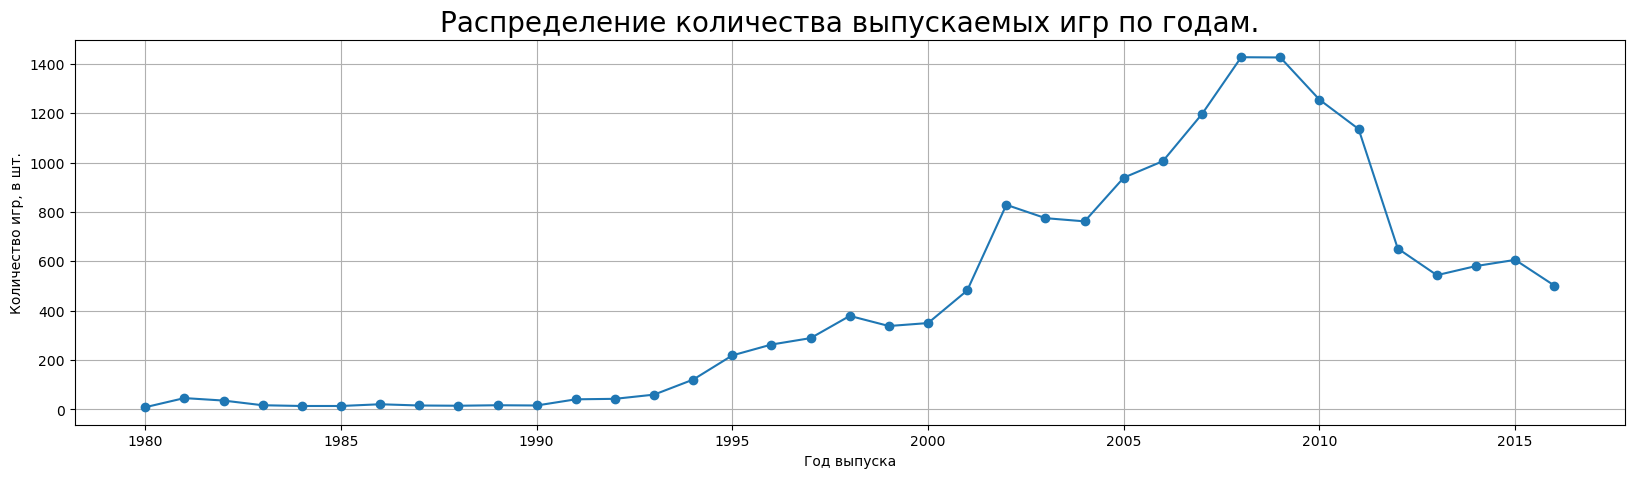

In [43]:
plt.figure(figsize=(20, 5))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –≤—ã–ø—É—Å–∫–∞–µ–º—ã—Ö –∏–≥—Ä –ø–æ –≥–æ–¥–∞–º.', fontsize=20)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä, –≤ —à—Ç.')
plt.xlabel('–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞')
plt.plot(df.groupby('year_of_release')['name'].count(), 'o-', label='NUMBER OF GAMES', alpha=1)
plt.grid(True)


In [44]:
df.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release 1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
platform                                                                     
2600             9.0  46.0  36.0  11.0   1.0   1.0   2.0   6.0   2.0   2.0   
3DO                -     -     -     -     -     -     -     -     -     -   
3DS                -     -     -     -     -     -     -     -     -     -   
DC                 -     -     -     -     -     -     -     -     -     -   
DS                 -     -     -     -     -   1.0     -     -     -     -   
GB                 -     -     -     -     -     -     -     -   1.0  10.0   
GBA                -     -     -     -     -     -     -     -     -     -   
GC                 -     -     -     -     -     -     -     -     -     -   
GEN                -     -     -     -     -     -     -     -     -     -   
GG                 -     -     -     -     -     -     -     -     -     -   
N64                -     -     -     -     -     -     -     -     -     -   
NES                -     -     -   6.0  13.0  11.0  19.0  10.0  11.0   5.0   
NG                 -     -     -     -     -     -     -     -     -     -   
PC                 -     -     -     -     -   1.0     -     -   1.0     -   
PCFX               -     -     -     -     -     -     -     -     -     -   
PS                 -     -     -     -     -     -     -     -     -     -   
PS2                -     -     -     -     -     -     -     -     -     -   
PS3                -     -     -     -     -     -     -     -     -     -   
PS4                -     -     -     -     -     -     -     -     -     -   
PSP                -     -     -     -     -     -     -     -     -     -   
PSV                -     -     -     -     -     -     -     -     -     -   
SAT                -     -     -     -     -     -     -     -     -     -   
SCD                -     -     -     -     -     -     -     -     -     -   
SNES               -     -     -     -     -     -     -     -     -     -   
TG16               -     -     -     -     -     -     -     -     -     -   
WS                 -     -     -     -     -     -     -     -     -     -   
Wii                -     -     -     -     -     -     -     -     -     -   
WiiU               -     -     -     -     -     -     -     -     -     -   
X360               -     -     -     -     -     -     -     -     -     -   
XB                 -     -     -     -     -     -     -     -     -     -   
XOne               -     -     -     -     -     -     -     -     -     -   

year_of_release  ...   2007   2008   2009   2010   2011   2012   2013   2014  \
platform         ...                                                           
2600             ...      -      -      -      -      -      -      -      -   
3DO              ...      -      -      -      -      -      -      -      -   
3DS              ...      -      -      -      -  116.0   93.0   91.0   80.0   
DC               ...    1.0    1.0      -      -      -      -      -      -   
DS               ...  376.0  492.0  403.0  323.0  153.0   23.0    8.0      -   
GB               ...      -      -      -      -      -      -      -      -   
GBA              ...    6.0      -      -      -      -      -      -      -   
GC               ...    4.0      -      -      -      -      -      -      -   
GEN              ...      -      -      -      -      -      -      -      -   
GG               ...      -      -      -      -      -      -      -      -   
N64              ...      -      -      -      -      -      -      -      -   
NES              ...      -      -      -      -      -      -      -      -   
NG               ...      -      -      -      -      -      -      -      -   
PC               ...   62.0   76.0  107.0   90.0  139.0   61.0   38.0   47.0   
PCFX             ...      -      -      -      -      -      -      -      -   
PS               ...      -      -      -      -      -      -   

–†–∞–∑–¥–µ–ª–∏–º —Ç–∞–±–ª–∏—Ü—É.

In [45]:
df.query('year_of_release <= 1992').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release 1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
platform                                                                     
2600             9.0  46.0  36.0  11.0   1.0   1.0   2.0   6.0   2.0   2.0   
DS                 -     -     -     -     -   1.0     -     -     -     -   
GB                 -     -     -     -     -     -     -     -   1.0  10.0   
GEN                -     -     -     -     -     -     -     -     -     -   
GG                 -     -     -     -     -     -     -     -     -     -   
NES                -     -     -   6.0  13.0  11.0  19.0  10.0  11.0   5.0   
PC                 -     -     -     -     -   1.0     -     -   1.0     -   
SNES               -     -     -     -     -     -     -     -     -     -   

year_of_release 1990  1991  1992  
platform                          
2600               -     -     -  
DS                 -     -     -  
GB               3.0   9.0   7.0  
GEN              1.0   1.0   6.0  
GG                 -     -   1.0  
NES              8.0   7.0   3.0  
PC                 -     -   5.0  
SNES             4.0  24.0  21.0

In [46]:
df.query('1990 <= year_of_release <= 2009').pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value='-')

year_of_release 1990  1991  1992  1993  1994  1995   1996   1997   1998  \
platform                                                                  
3DO                -     -     -     -   1.0   2.0      -      -      -   
DC                 -     -     -     -     -     -      -      -    7.0   
DS                 -     -     -     -     -     -      -      -      -   
GB               3.0   9.0   7.0     -   3.0   4.0    6.0    8.0    8.0   
GBA                -     -     -     -     -     -      -      -      -   
GC                 -     -     -     -     -     -      -      -      -   
GEN              1.0   1.0   6.0   7.0  12.0     -      -      -      -   
GG                 -     -   1.0     -     -     -      -      -      -   
N64                -     -     -     -     -     -   18.0   49.0   77.0   
NES              8.0   7.0   3.0   4.0   1.0     -      -      -      -   
NG                 -     -     -   2.0   4.0   4.0    2.0      -      -   
PC                 -     -   5.0     -   6.0   2.0    4.0    6.0    8.0   
PCFX               -     -     -     -     -     -    1.0      -      -   
PS                 -     -     -     -  17.0  99.0  164.0  188.0  248.0   
PS2                -     -     -     -     -     -      -      -      -   
PS3                -     -     -     -     -     -      -      -      -   
PSP                -     -     -     -     -     -      -      -      -   
SAT                -     -     -     -  19.0  52.0   38.0   34.0   29.0   
SCD                -     -     -   1.0   5.0     -      -      -      -   
SNES             4.0  24.0  21.0  46.0  53.0  54.0   30.0    4.0    2.0   
TG16               -     -     -     -     -   2.0      -      -      -   
WS                 -     -     -     -     -     -      -      -      -   
Wii                -     -     -     -     -     -      -      -      -   
X360               -     -     -     -     -     -      -      -      -   
XB                 -     -     -     -     -     -      -      -      -   

year_of_release   1999   2000   2001   2002   2003   2004   2005   2006  \
platform                                                                  
3DO                  -      -      -      -      -      -      -      -   
DC                14.0   20.0    8.0    1.0      -      -      -      -   
DS                   -      -      -      -      -   23.0  118.0  201.0   
GB                11.0   17.0   10.0      -      -      -      -      -   
GBA                  -    1.0  107.0  198.0  150.0  175.0  135.0   39.0   
GC                   -      -   22.0  152.0  144.0   83.0   97.0   40.0   
GEN                  -      -      -      -      -      -      -      -   
GG                   -      -      -      -      -      -      -      -   
N64              102.0   60.0    9.0    1.0      -      -      -      -   
NES                  -      -      -      -      -      -      -      -   
NG                   -      -      -      -      -      -      -      -   
PC                 7.0    7.0   15.0   19.0   33.0   30.0   37.0   52.0   
PCFX                 -      -      -      -      -      -      -      -   
PS               200.0  160.0   91.0   20.0    3.0      -      -      -   
PS2                  -   82.0  185.0  280.0  256.0  259.0  260.0  259.0   
PS3                  -      -      -      -      -      -      -   27.0   
PSP                  -      -      -      -      -   15.0   95.0  189.0   
SAT                1.0      -      -      -      -      -      -      -   
SCD                  -      -      -      -      -      -      -      -   
SNES               1.0      -      -      -      -      -      -      -   
TG16                 -      -      -      -      -      -      -      -   
WS                 2.0    2.0    2.0      -      -      -      -      -   
Wii                  -      -      -      -      -      -      -   44.0   
X360                 -      -      -      -      -      -   18.0   93.0   
XB                   -  

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –≤–∏–¥–Ω–æ, —á—Ç–æ —Ä–æ—Å—Ç –≤—ã–ø—É—Å–∫–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –∏–≥—Ä –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è —Å 1991 –ø–æ 2008. –í 2008 –≥. –º–∞–∫—Å –∫–æ–ª-–≤–æ –∏–≥—Ä. –ø–æ—Å–ª–µ –≤—ã–ø—É—Å–∫ –∏–≥—Ä –∏–¥–µ—Ç –Ω–∞ —Å–ø–∞–¥. –î–æ 1991 –Ω–∞ –æ–¥–Ω–æ–º —É—Ä–æ–≤–Ω–µ.

–° 1980 –ø–æ 1990 –±—ã–ª–∞ —ç–ø–æ—Ö–∞ —Å—Ç–∞—Ä—ã—Ö –∫–æ–Ω—Å–æ–ª–µ–π. –†–æ—Å—Ç –∫–æ–Ω—Å–æ–ª–µ–π —Å–≤—è–∑–µ–Ω —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —Å —Ç–µ–º. —á—Ç–æ Super Nintendo Entertainment System (SNES) –±—ã–ª–∞ –≤—ã–ø—É—â–µ–Ω–∞ –≤ –Ø–ø–æ–Ω–∏–∏ 21 –Ω–æ—è–±—Ä—è 1990 –≥–æ–¥–∞, —É–∂–µ 23 –∞–≤–≥—É—Å—Ç–∞ 1991 –≥–æ–¥–∞ –æ–Ω–∞ –≤—ã—Ö–æ–¥–∏—Ç –¥–ª—è –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–≥–æ —Ä—ã–Ω–∫–∞, —á—Ç–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫ –ø–æ–ø—É–ª–∏—Ä–∏–∑–∞—Ü–∏–∏ –∏–≥—Ä. –°–ø–∞–¥ –≤—ã–ø—É—Å–∫ –Ω–æ–≤—ã—Ö –∏–≥—Ä —Å 2008 –º–æ–∂–µ—Ç –±—ã—Ç—å –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ –Ω–∞—á–∞–ª–æ–º –ú–∏—Ä–æ–≤–æ–≥–æ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–≥–æ –∫—Ä–∏–∑–∏—Å–∞.

**–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –º–µ–Ω—è–ª–∏—Å—å –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º –∏ –∑–∞ –∫–∞–∫–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω—ã–π —Å—Ä–æ–∫ –ø–æ—è–≤–ª—è—é—Ç—Å—è –Ω–æ–≤—ã–µ –∏ –∏—Å—á–µ–∑–∞—é—Ç —Å—Ç–∞—Ä—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã.**

**C–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä.**

In [47]:
platform_total_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_total_sales

total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.33
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81
PC             255.76
GB             254.43
XB             251.57
NES            251.05
N64            218.01
SNES           200.04
GC             196.73
XOne           159.32
2600            86.48
WiiU            82.19
PSV             53.81
SAT             33.59
GEN             28.35
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03

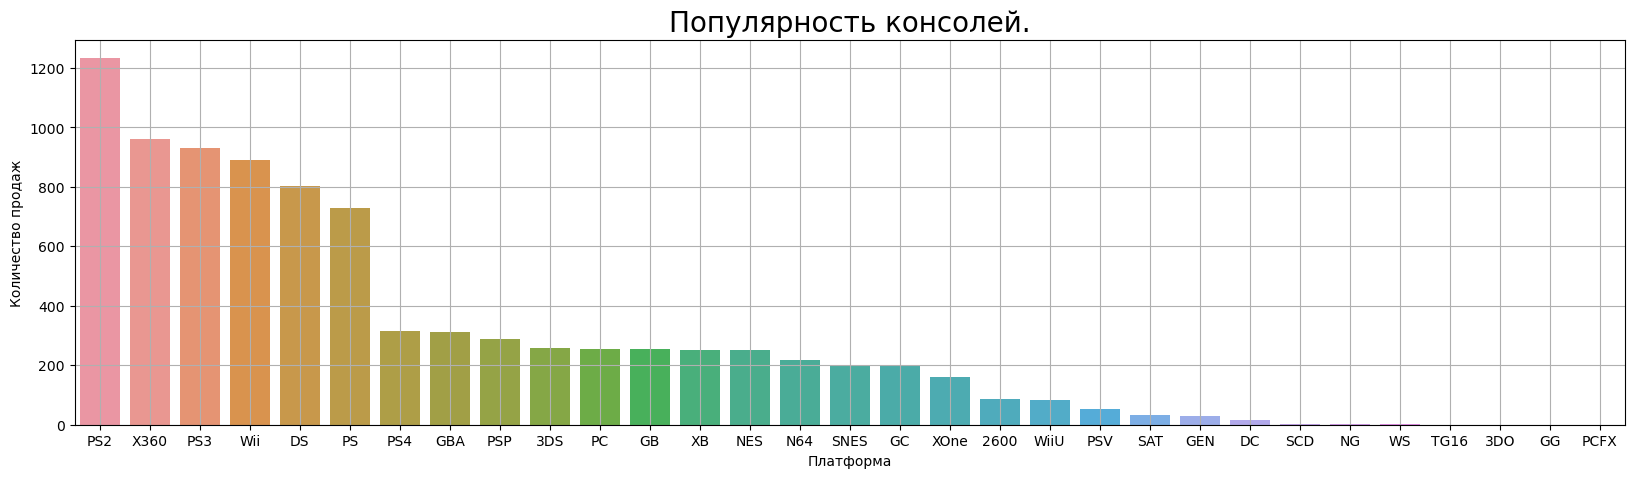

In [48]:
plt.figure(figsize=(20, 5))
plt.title('–ü–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∫–æ–Ω—Å–æ–ª–µ–π.', fontsize=20)
sns.barplot(x=platform_total_sales.index, y=platform_total_sales['total_sales'])
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂')
plt.xlabel('–ü–ª–∞—Ç—Ñ–æ—Ä–º–∞')
plt.grid(True);

–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å –Ω–∞–∏–±–æ–ª—å—à–µ–º –æ—Ç—Ä—ã–≤–æ–º –ª–∏–¥–∏—Ä—É—é—Ç 6 –ø–ª–∞—Ç—Ñ–æ—Ä–º.

PS4, XBOXONE –Ω–µ –º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, —Ö–æ—Ç—è –∏ –Ω–µ –ø–æ–ø–∞–ª–∏ –≤ —Å–ø–∏—Å–æ–∫ –ª–∏–¥–µ—Ä–æ–≤. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –æ–Ω–∏ –≤—ã—à–ª–∏ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–¥–∞–≤–Ω–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º –Ω–∞ –º–æ–º–µ–Ω—Ç —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è –±–∞–∑—ã –¥–∞–Ω–Ω—ã—Ö.

**–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –¢–æ–ø 6 –ø–ª–∞—Ç—Ñ–æ—Ä–º**

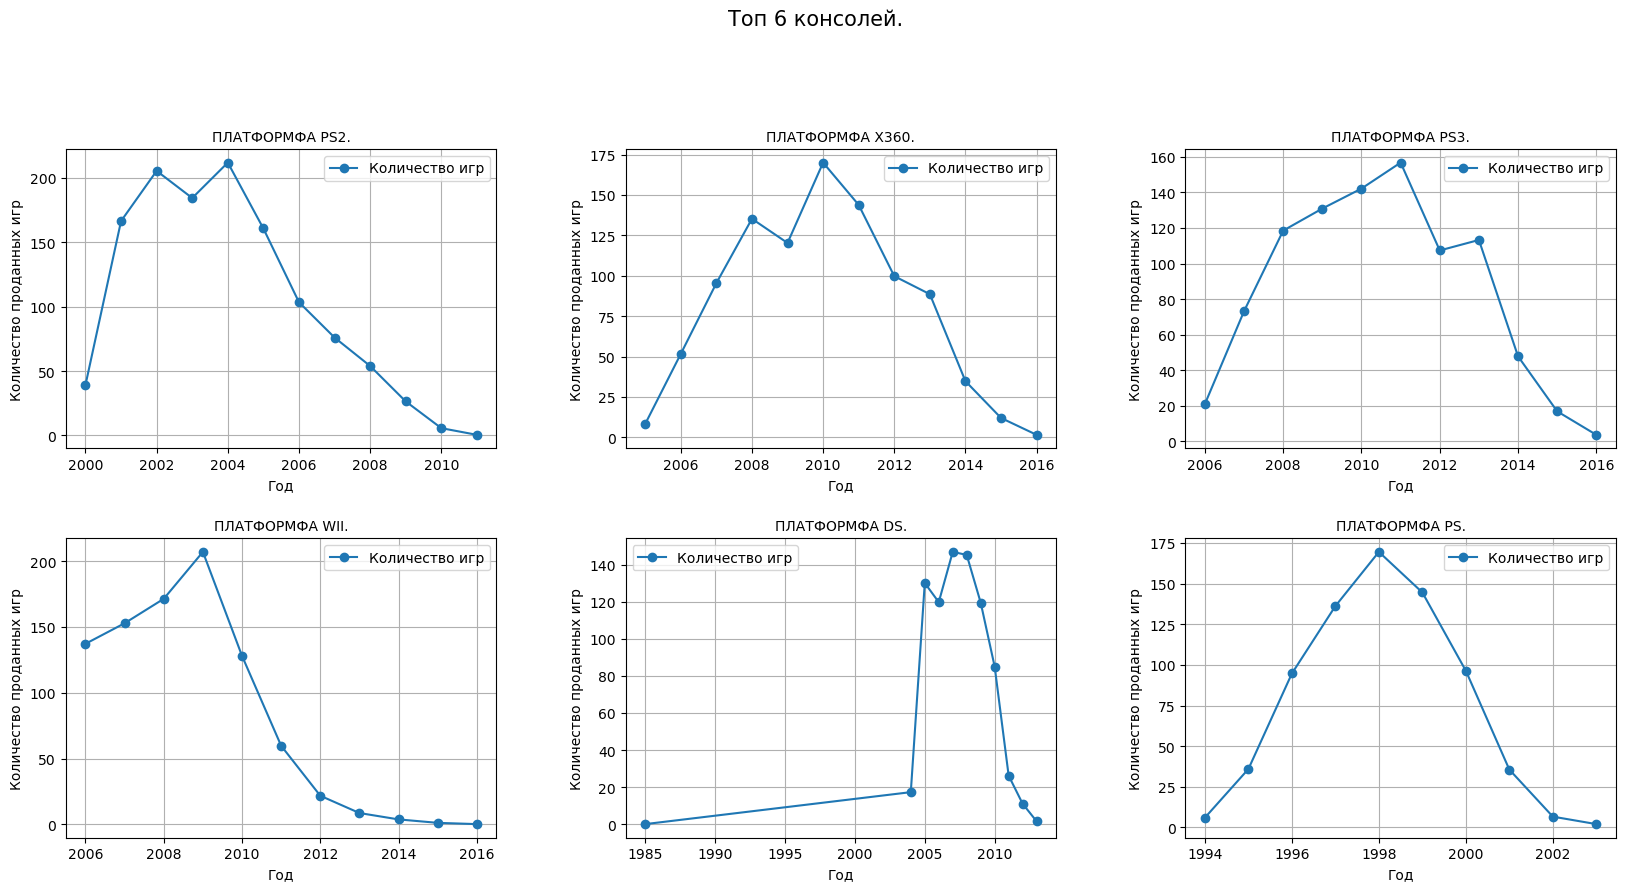

In [49]:
position = 0
top_platform = platform_total_sales.reset_index()['platform'].head(6)
plt.figure(figsize=[20, 14])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.suptitle('–¢–æ–ø 6 –∫–æ–Ω—Å–æ–ª–µ–π.', fontsize=15)
for name_of_platform in top_platform:
    position += 1
    pvt = df.query('platform == @name_of_platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    plt.subplot(3, 3, position)
    plt.title(f'–ü–õ–ê–¢–§–û–†–ú–§A {name_of_platform.upper()}.', fontsize=10)
    plt.plot(pvt, 'o-', label='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä', alpha=1)
    plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä')
    plt.xlabel('–ì–æ–¥')
    plt.grid(True)
    plt.legend()
plt.show();

–í—Å–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –∏–º–µ—é—Ç —Ç–µ–Ω–¥–µ–Ω—Ü–∏—é —Å–ø–∞–¥–∞ –∫ 2016 –≥–æ–¥—É.

**–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∂–∏–∑–Ω–µ–Ω–Ω—ã–π —Ü–∏–∫–ª –∫–æ–Ω—Å–æ–ª–∏**

In [50]:
life_cycle_of_consoles = []
for name_platform in top_platform:
    life_cycle = df.query('(platform == @name_platform)').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').count()
    life_cycle_of_consoles.append(life_cycle)
mean_life_cycle = int(np.mean(life_cycle_of_consoles))
mean_life_cycle

11

–°—Ä–µ–¥–Ω–∏–π –∂–∏–∑–Ω–µ–Ω—ã–π —Ü–∏–∫–ª –∫–æ–Ω—Å–æ–ª–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 11 –ª–µ—Ç

**–ü–µ—Ä–∏–æ–¥ –¥–ª—è —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –Ω–∞ 2017 –≥–æ–¥.**

–í–æ–∑—å–º–µ–º –∞–∫—Ç—É–∞–ª—å–Ω—ã–π –ø–µ—Ä–∏—É–¥ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 5 –ª–µ—Ç —Å 2012 –≥. –¥–ª—è —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è –ø—Ä–æ–≥–Ω–æ–∑–∞ –∑–∞ 2017 –≥–æ–¥.

In [51]:
df_forecast = df.query('year_of_release >= 2012')

In [52]:
df_forecast_quantity = len(df_forecast['platform'].unique())

print(f'\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–Ω—Å–æ–ª–µ–π –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞ - {df_forecast_quantity }')


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–Ω—Å–æ–ª–µ–π –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∞ - 11


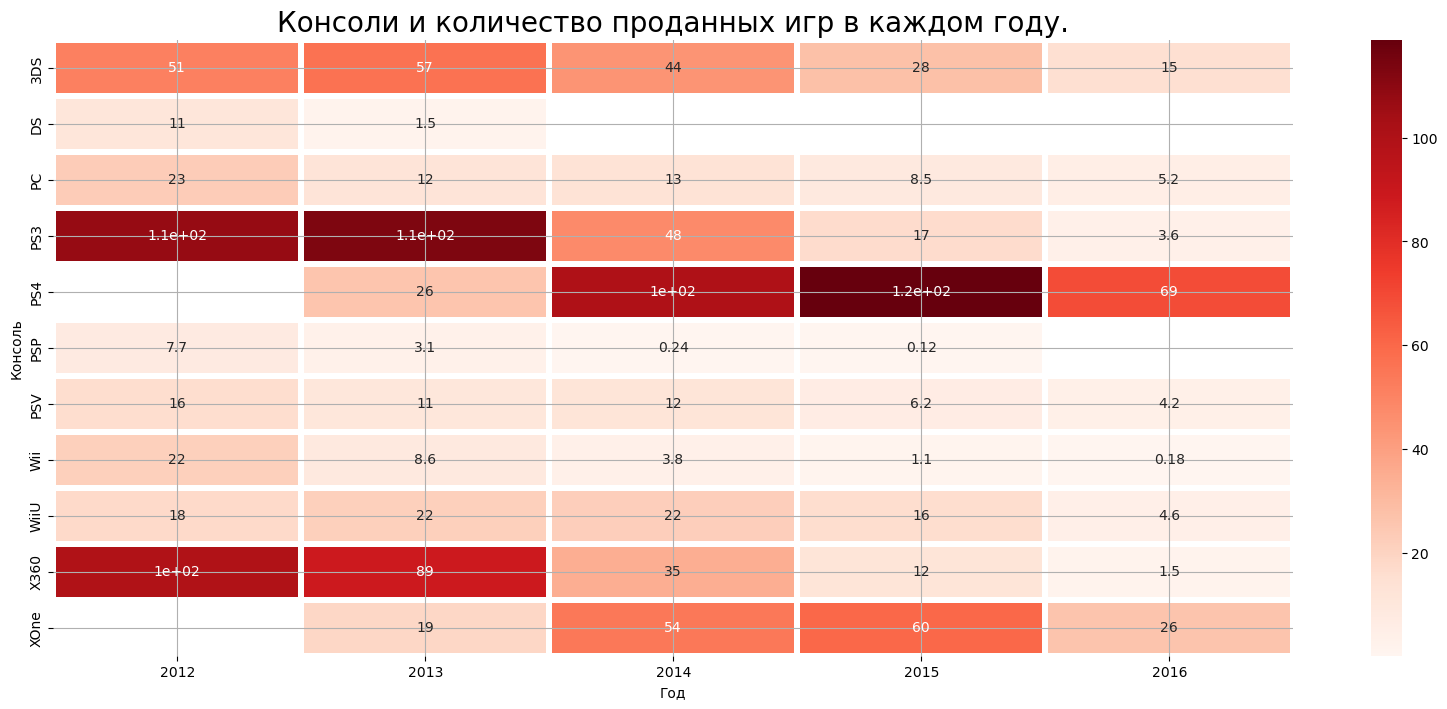

In [53]:
plt.figure(figsize=(20, 8))
plt.title('–ö–æ–Ω—Å–æ–ª–∏ –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –≥–æ–¥—É.', fontsize=20)
(sns.heatmap(df_forecast.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'), annot=True, cmap='Reds',linewidths=3))
plt.ylabel('–ö–æ–Ω—Å–æ–ª—å')
plt.xlabel('–ì–æ–¥')
plt.grid(True);

In [54]:
df_forecast.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release    2012    2013    2014    2015   2016
platform                                              
3DS               51.36   56.57   43.76   27.78  15.14
DS                11.01    1.54     NaN     NaN    NaN
PC                23.22   12.38   13.28    8.52   5.25
PS3              107.35  113.25   47.76   16.82   3.60
PS4                 NaN   25.99  100.00  118.90  69.25
PSP                7.69    3.14    0.24    0.12    NaN
PSV               16.19   10.59   11.90    6.25   4.25
Wii               21.71    8.59    3.75    1.14   0.18
WiiU              17.56   21.65   22.03   16.35   4.60
X360              99.74   88.58   34.74   11.96   1.52
XOne                NaN   18.96   54.07   60.14  26.15

–¢–æ–ø 5 –ø–ª–∞—Ç—Ñ–æ—Ä–º –±—É–¥—É—Ç: 3DS, XONE, PS4, WIIU, PC. –ú–Ω–æ–≥–∏–µ –∫–æ–Ω—Å–æ–ª–∏ –∫ 2016 –≥ –∏–¥—É—Ç –Ω–∞ —Å–ø–∞–¥, —Ç.–∫. —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –≤—ã—Ö–æ–¥–æ–º –±–æ–ª–µ–µ –Ω–æ–≤–æ–π –∫–æ–Ω—Å–æ–ª–∏, –≤–∑–∞–º–µ–Ω —Å—Ç–∞—Ä–æ–π. –ö–∞–∫ –Ω–∞–ø—Ä–∏–º–µ—Ä –Ω–∞ —Å–º–µ–Ω—É PS3 –ø—Ä–∏—à–ª–∞ PS4.

**–ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ ¬´—è—â–∏–∫ —Å —É—Å–∞–º–∏¬ª –ø–æ –≥–ª–æ–±–∞–ª—å–Ω—ã–º –ø—Ä–æ–¥–∞–∂–∞–º –∏–≥—Ä –≤ —Ä–∞–∑–±–∏–≤–∫–µ –ø–æ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º.**

In [55]:
df_list_platforms = ['PS4', 'XOne', 'WiiU', '3DS', 'PC']
df_platform = df_forecast[df_forecast['platform'].isin(df_list_platforms)]
df_platform.head()

name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
33                        Pokemon X/Pokemon Y      3DS             2013   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
62                    New Super Mario Bros. 2      3DS             2012   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38            -1   
33  Role-Playing      5.28      4.19      4.35         0.78            -1   
42        Action      3.96      6.31      0.38         1.97            97   
47  Role-Playing      4.35      3.49      3.10         0.74            -1   
62      Platform      3.66      3.14      2.47         0.63            78   

    user_score rating  total_sales  
31        -1.0     NR        14.63  
33        -1.0     NR        14.60  
42         8.3      M        12.62  
47        -1.0     NR        11.68  
62         7.2      E         9.90

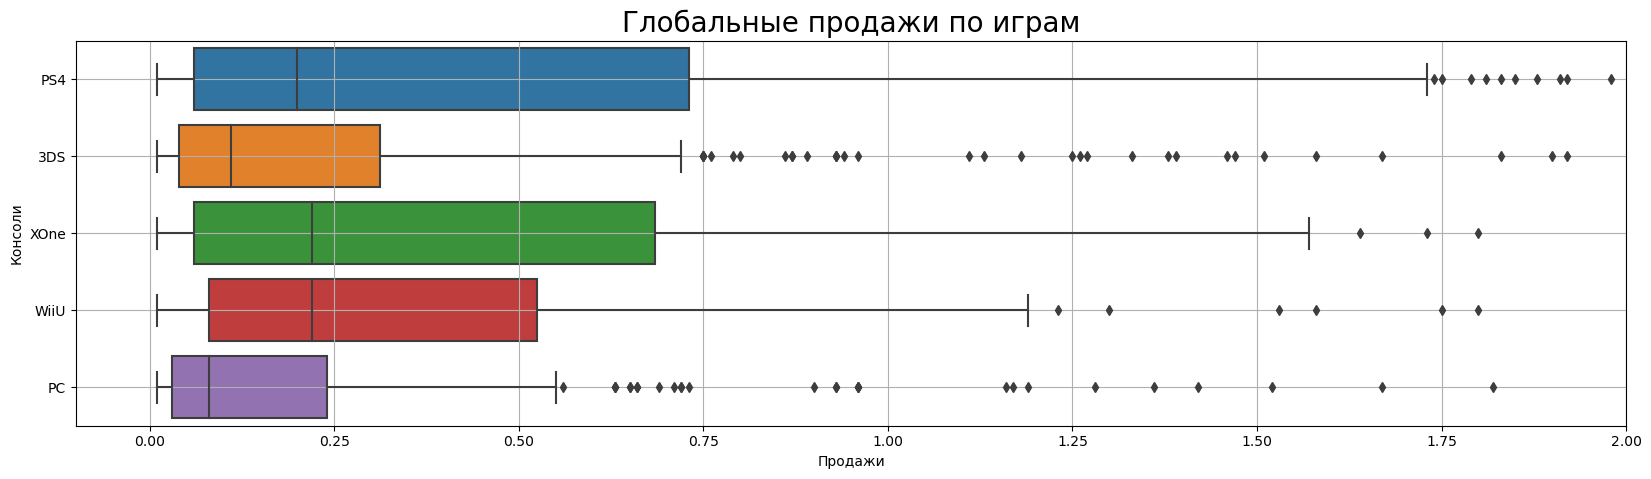

In [56]:
plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('–ì–ª–æ–±–∞–ª—å–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –ø–æ –∏–≥—Ä–∞–º', fontsize=20)
sns.boxplot(x=df_platform['total_sales'], y=df_platform['platform'], orient='h')
plt.ylabel('–ö–æ–Ω—Å–æ–ª–∏')
plt.xlabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.grid(True);

–ë–æ–ª—å—à–µ–≥–æ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞—é—Ç—Å—è –∏–≥—Ä—ã –¥–ª—è PS4, XBOXONE, WIIU.

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω–æ:
* –ú–µ–¥–∏–∞–Ω–∞ —É –ª–∏–¥–µ—Ä–æ–≤ –ø—Ä–æ–¥–∞–∂ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –¥–∞–ª—å—à–µ.
* –†–∞–∑–º–∞—Ö —É—Å–æ–≤ –¥–ª—è –ª–∏–¥–µ—Ä–æ–≤ —à–∏—Ä–µ —á–µ–º —É –¥–≤—É—Ö –¥—Ä—É–≥–∏—Ö –∫–æ–Ω—Å–æ–ª–µ–π. –î–∞–Ω–Ω—ã–µ –∫–æ–Ω—Å–æ–ª–∏ –∏–º–µ—é—Ç –±–æ–ª—å—à–æ–µ —á–∏—Å–ª–æ –ø—Ä–æ–¥–∞–∂. –í—ã–±—Ä–æ—Å—ã –∏ –∞–Ω–∞–º–∞–ª–∏–∏ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –∑–∞ –ø—Ä–∏–¥–µ–ª–∞–º–∏ —É—Å–æ–≤.

**–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤–Ω—É—Ç—Ä–∏ –æ–¥–Ω–æ–π –ø–æ–ø—É–ª—è—Ä–Ω–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –æ—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –∫—Ä–∏—Ç–∏–∫–æ–≤. –ü–æ—Å—Ç—Ä–æ–∏–º –¥–∏–∞–≥—Ä–∞–º–º—É —Ä–∞—Å—Å–µ—è–Ω–∏—è –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –º–µ–∂–¥—É –æ—Ç–∑—ã–≤–∞–º–∏ –∏ –ø—Ä–æ–¥–∞–∂–∞–º–∏.**

In [57]:
df_game_ps4 = df_platform.query('platform == "PS4" and user_score != -1 and critic_score != -1')
print(len(df_game_ps4))

249


In [58]:
df_game_ps4_user = df_platform.query('platform == "PS4" and user_score != -1')
df_game_ps4_critic = df_platform.query('platform == "PS4" and critic_score != -1')
print(len(df_game_ps4_user))
print(len(df_game_ps4_critic))

257
252


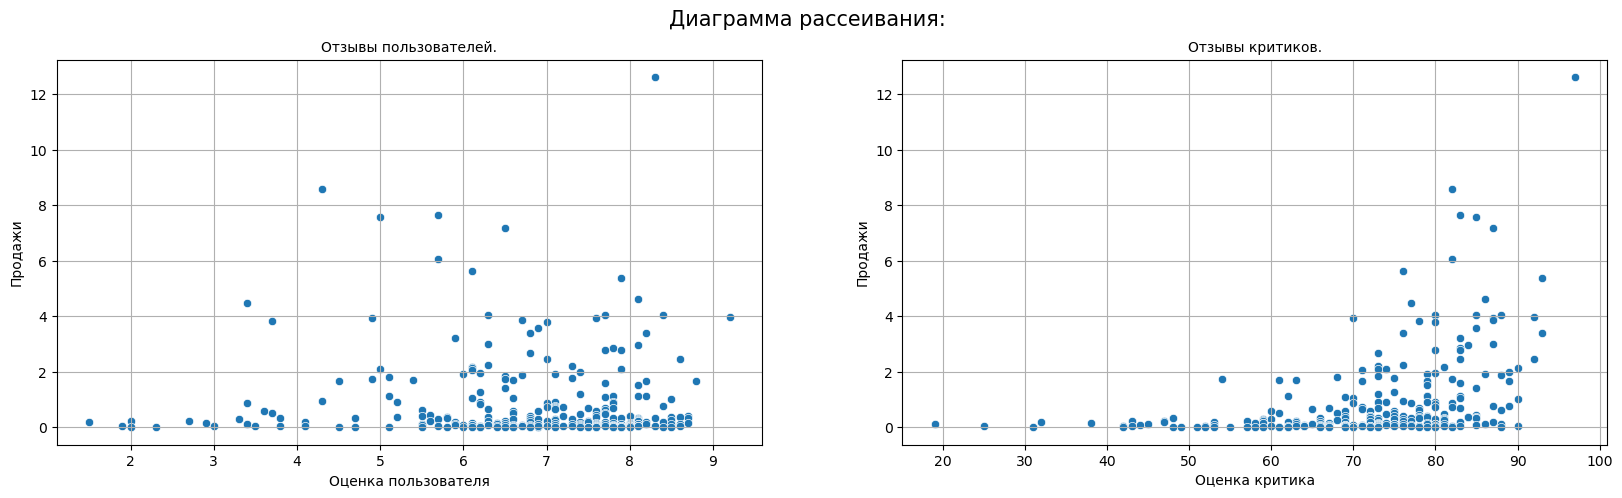

In [60]:
plt.figure(figsize=(20, 5))
plt.suptitle('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('–û—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.', fontsize=10)
sns.scatterplot(x=df_game_ps4_user['user_score'], y=df_game_ps4_user['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('–û—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤.', fontsize=10)
sns.scatterplot(x=df_game_ps4_critic['critic_score'], y=df_game_ps4_critic['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–∞')
plt.grid(True);

In [61]:
cor_user_score = df_game_ps4_user['total_sales'].corr(df_game_ps4_user['user_score'])
cor_critic_score = df_game_ps4_critic['total_sales'].corr(df_game_ps4_critic['critic_score'])
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π - {cor_user_score:.2f}')
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ - {cor_critic_score:.2f}')


–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π - -0.03

–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ - 0.41


–ö–æ—ç—Ñ. –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π. –û—Ç–∑—ã–≤—ã –æ–∫–∞–∑—ã–≤–∞—é—Ç —Å—Ä–µ–¥–Ω–µ–µ –≤–ª–∏—è–Ω–∏–µ. –ú–Ω–µ–Ω–∏–µ –∫—Ä–∏—Ç–∏–∫–æ–≤ –±–æ–ª—å—à–µ –≤–ª–∏–µ—Ç –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏, —á–µ–º –º–Ω–µ–Ω–∏–µ –∫—Ä–∏—Ç–∏–∫–æ–≤.

**–°–æ–æ—Ç–Ω–µ—Å–µ–º –≤—ã–≤–æ–¥—ã —Å –ø—Ä–æ–¥–∞–∂–∞–º–∏ –∏–≥—Ä –Ω–∞ –¥—Ä—É–≥–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞—Ö.**

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–æ –≤—Å–µ–º –∫–æ–Ω—Å–æ–ª—è–º.


–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –≤—Å–µ–º –∫–æ–Ω—Å–æ–ª—è–º - 0.05

–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ –≤—Å–µ–º –∫–æ–Ω—Å–æ–ª—è–º - 0.32


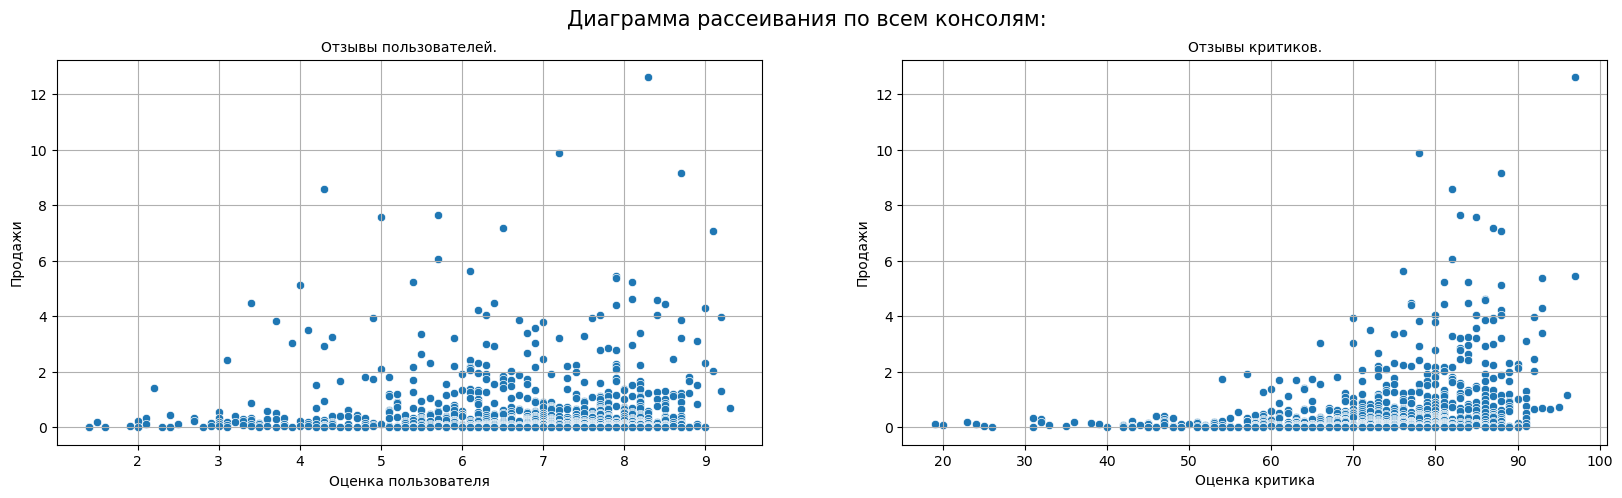

In [62]:
df_game_total_user = df_platform.query('user_score != -1')
df_game_total_critic = df_platform.query('critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –ø–æ –≤—Å–µ–º –∫–æ–Ω—Å–æ–ª—è–º:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('–û—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.', fontsize=10)
sns.scatterplot(x=df_game_total_user['user_score'], y=df_game_total_user['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('–û—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤.', fontsize=10)
sns.scatterplot(x=df_game_total_critic['critic_score'], y=df_game_total_critic['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–∞')
plt.grid(True);

cor_user_score_total = df_game_total_user['total_sales'].corr(df_game_total_user['user_score'])
cor_critic_score_total = df_game_total_critic['total_sales'].corr(df_game_total_critic['critic_score'])
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ –≤—Å–µ–º –∫–æ–Ω—Å–æ–ª—è–º - {cor_user_score_total:.2f}')
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ –≤—Å–µ–º –∫–æ–Ω—Å–æ–ª—è–º - {cor_critic_score_total:.2f}')

–†–∞—Å—Å–º–æ—Ç—Ä–∏ XOne.


–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ XOne - -0.07

–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ XOne - 0.42


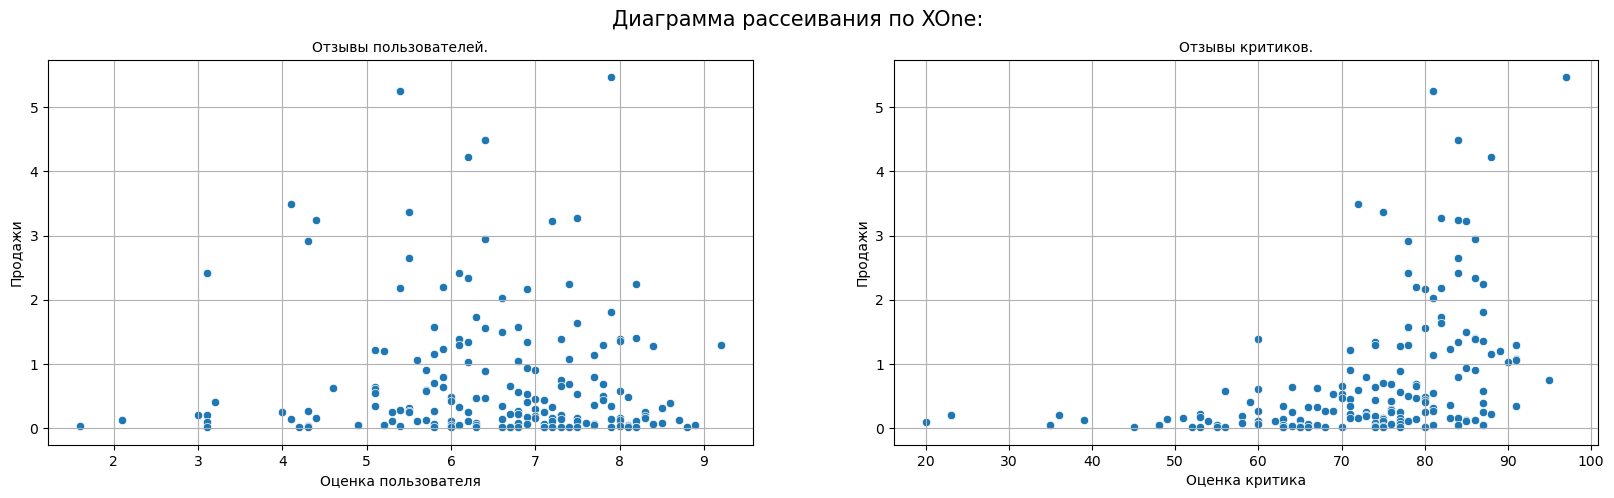

In [63]:
df_game_xone_user = df_platform.query('platform == "XOne" and user_score != -1')
df_game_xone_critic = df_platform.query('platform == "XOne" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –ø–æ XOne:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('–û—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.', fontsize=10)
sns.scatterplot(x=df_game_xone_user['user_score'], y=df_game_xone_user['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('–û—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤.', fontsize=10)
sns.scatterplot(x=df_game_xone_critic['critic_score'], y=df_game_xone_critic['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–∞')
plt.grid(True);

cor_user_score_xone = df_game_xone_user['total_sales'].corr(df_game_xone_user['user_score'])
cor_critic_score_xone = df_game_xone_critic['total_sales'].corr(df_game_xone_critic['critic_score'])
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ XOne - {cor_user_score_xone:.2f}')
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ XOne - {cor_critic_score_xone:.2f}')

–†–∞—Å—Å–º–æ—Ç—Ä–∏ WiiU.


–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ WiiU - 0.40

–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ WiiU - 0.35


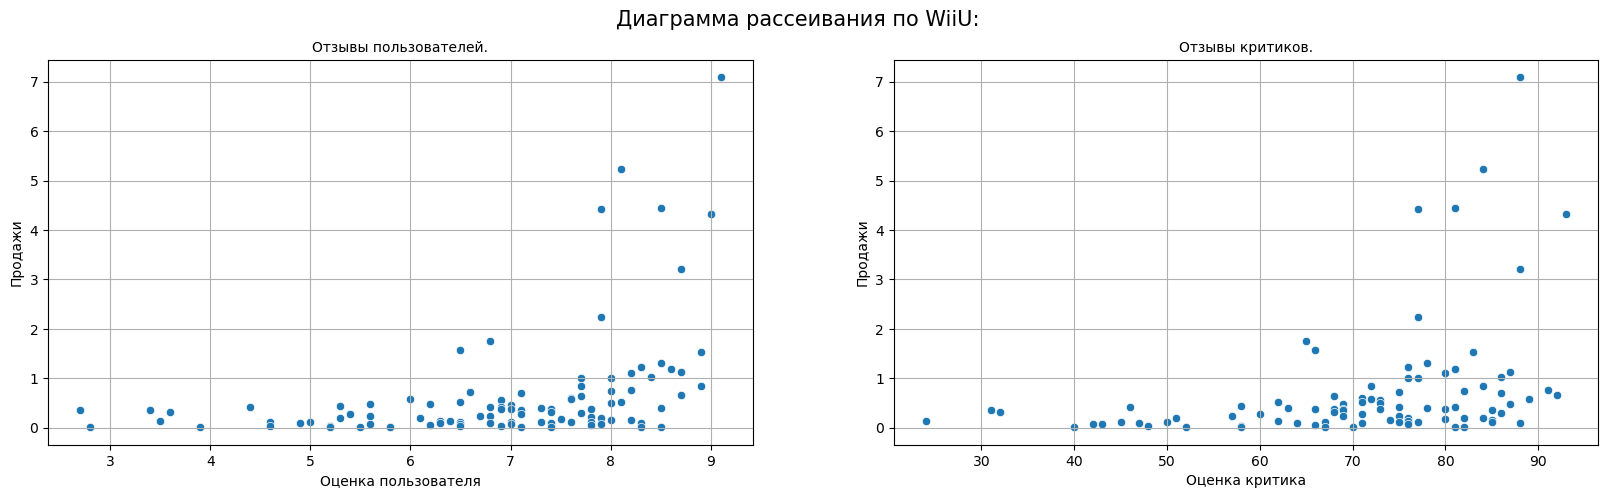

In [64]:
df_game_wiiu_user = df_platform.query('platform == "WiiU" and user_score != -1')
df_game_wiiu_critic = df_platform.query('platform == "WiiU" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –ø–æ WiiU:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('–û—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.', fontsize=10)
sns.scatterplot(x=df_game_wiiu_user['user_score'], y=df_game_wiiu_user['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('–û—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤.', fontsize=10)
sns.scatterplot(x=df_game_wiiu_critic['critic_score'], y=df_game_wiiu_critic['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–∞')
plt.grid(True);

cor_user_score_wiiu = df_game_wiiu_user['total_sales'].corr(df_game_wiiu_user['user_score'])
cor_critic_score_wiiu = df_game_wiiu_critic['total_sales'].corr(df_game_wiiu_critic['critic_score'])
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ WiiU - {cor_user_score_wiiu:.2f}')
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ WiiU - {cor_critic_score_wiiu:.2f}')

–†–∞—Å—Å–º–æ—Ç—Ä–∏ 3DS.


–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ 3DS - 0.20

–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ 3DS - 0.32


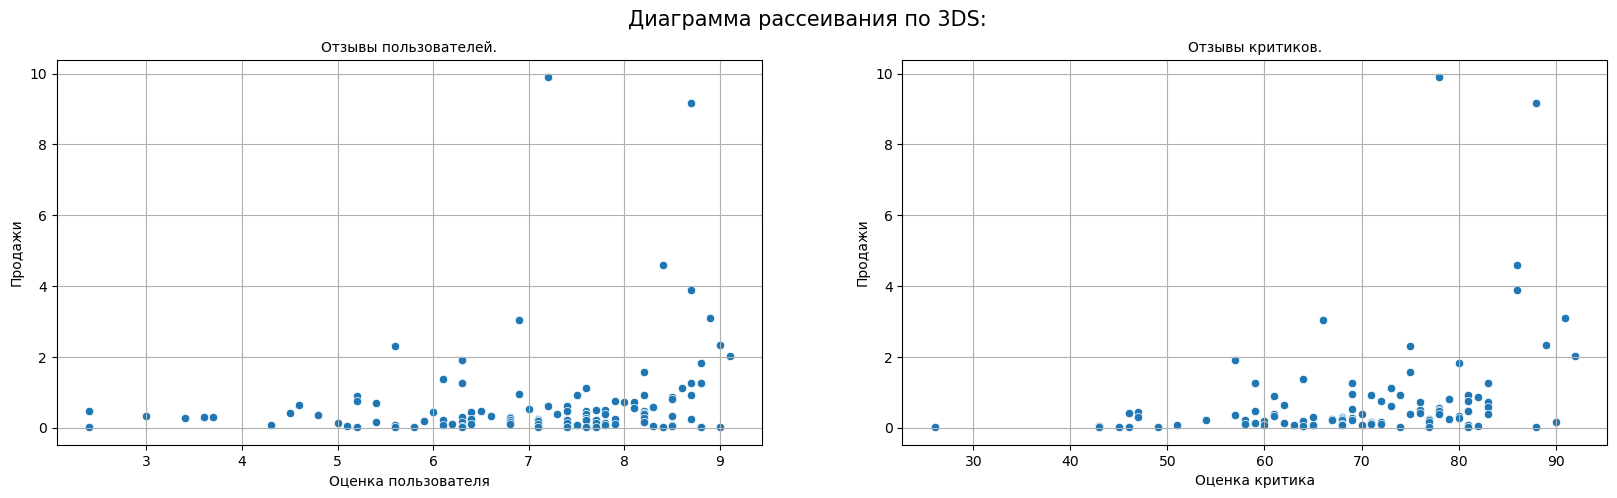

In [65]:
df_game_3ds_user = df_platform.query('platform == "3DS" and user_score != -1')
df_game_3ds_critic = df_platform.query('platform == "3DS" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –ø–æ 3DS:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('–û—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.', fontsize=10)
sns.scatterplot(x=df_game_3ds_user['user_score'], y=df_game_3ds_user['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('–û—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤.', fontsize=10)
sns.scatterplot(x=df_game_3ds_critic['critic_score'], y=df_game_3ds_critic['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–∞')
plt.grid(True);

cor_user_score_3ds = df_game_3ds_user['total_sales'].corr(df_game_3ds_user['user_score'])
cor_critic_score_3ds = df_game_3ds_critic['total_sales'].corr(df_game_3ds_critic['critic_score'])
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ 3DS - {cor_user_score_3ds:.2f}')
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ 3DS - {cor_critic_score_3ds:.2f}')

–†–∞—Å—Å–º–æ—Ç—Ä–∏ PC.


–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ PC - -0.12

–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ PC - 0.24


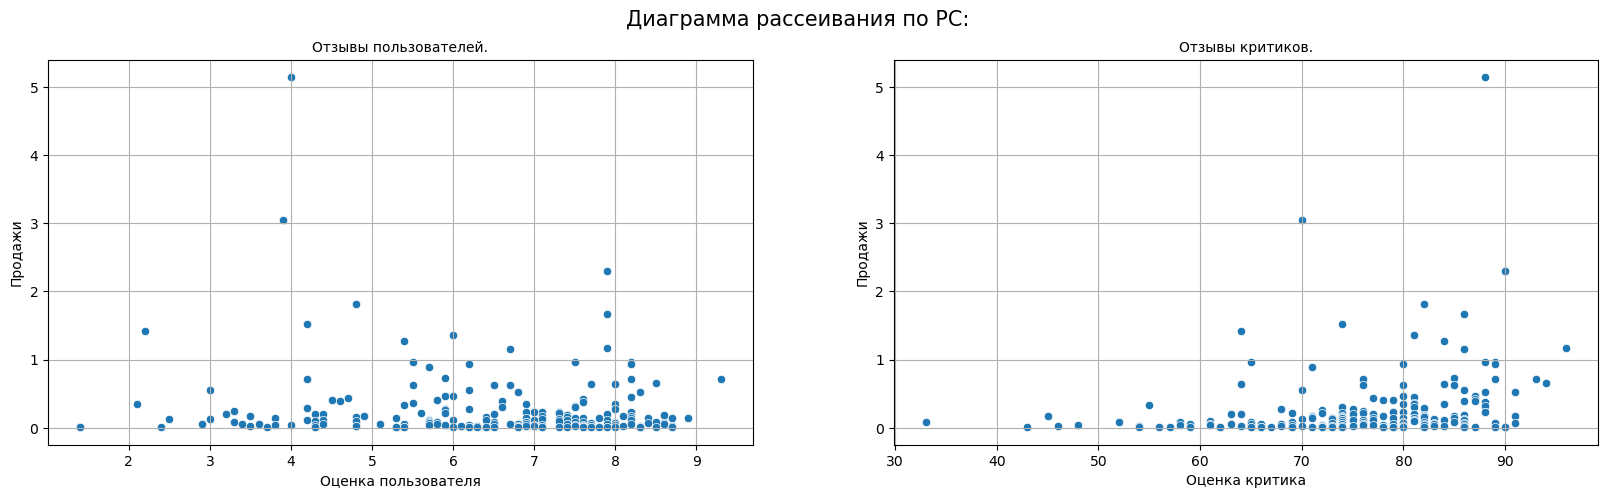

In [66]:
df_game_pc_user = df_platform.query('platform == "PC" and user_score != -1')
df_game_pc_critic = df_platform.query('platform == "PC" and critic_score != -1')

plt.figure(figsize=(20, 5))
plt.suptitle('–î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ–∏–≤–∞–Ω–∏—è –ø–æ PC:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('–û—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π.', fontsize=10)
sns.scatterplot(x=df_game_pc_user['user_score'], y=df_game_pc_user['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('–û—Ç–∑—ã–≤—ã –∫—Ä–∏—Ç–∏–∫–æ–≤.', fontsize=10)
sns.scatterplot(x=df_game_pc_critic['critic_score'], y=df_game_pc_critic['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–∞')
plt.grid(True);

cor_user_score_pc = df_game_pc_user['total_sales'].corr(df_game_pc_user['user_score'])
cor_critic_score_pc = df_game_pc_critic['total_sales'].corr(df_game_pc_critic['critic_score'])
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –ø–æ PC - {cor_user_score_pc:.2f}')
print(f'\n–ö–æ—ç—Ñ—Ñ–∏—Ü–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Ç–∑—ã–≤–æ–≤ –∫—Ä–∏—Ç–∏–∫–æ–≤ –ø–æ PC - {cor_critic_score_pc:.2f}')

–û—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ –≤–ª–∏—è–µ—Ç –±–æ–ª—å—à–µ –Ω–∞ –ø—Ä–æ–¥–∞–∂–∏, —á–µ–º –æ—Ü–µ–Ω–∫–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º —è–≤–ª—è–µ—Ç—Å—è, –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ WiiU, —Ç–∞–º –Ω–∞ –Ω–µ–º–Ω–æ–≥–æ –ø—Ä–∏–≤–∞–ª–∏—Ä—É–µ—Ç –º–Ω–µ–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –°–∞–º–æ–µ –±–æ–ª—å—à–æ–µ –≤–ª–∏—è–Ω–∏–µ –Ω–∞ –ø—Ä–æ–¥–∞–∂—É –∏–º–µ—é—Ç –∫—Ä–∏—Ç–∏–∫–∏ –Ω–∞ —Ç–∞–∫–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞—Ö, –∫–∞–∫ PS4 –∏ XOne. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å –æ–±—É—Å–ª–æ–≤–ª–µ–Ω–Ω–æ —Ç–µ–º, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –∫–æ–Ω—Å–æ–ª–∏ –≤—ã—à–ª–∏ –Ω–µ–¥–∞–≤–Ω–æ (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ—Ç—á–µ—Ç–∞) –≤ 2013 –∏ –∏–º–µ—é—Ç —Å–∞–º—É—é –±–æ–ª—å—à—É—é –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å.

**–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –æ–±—â–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º.**

–†–∞—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –¢–û–ü 5 –ø–ª–∞—Ç—Ñ–æ—Ä–º.

genre  total_sales
0        Shooter        0.440
1         Sports        0.260
2       Platform        0.245
3   Role-Playing        0.205
4       Fighting        0.155
5           Misc        0.150
6         Action        0.130
7         Racing        0.120
8     Simulation        0.120
9       Strategy        0.080
10        Puzzle        0.065
11     Adventure        0.060

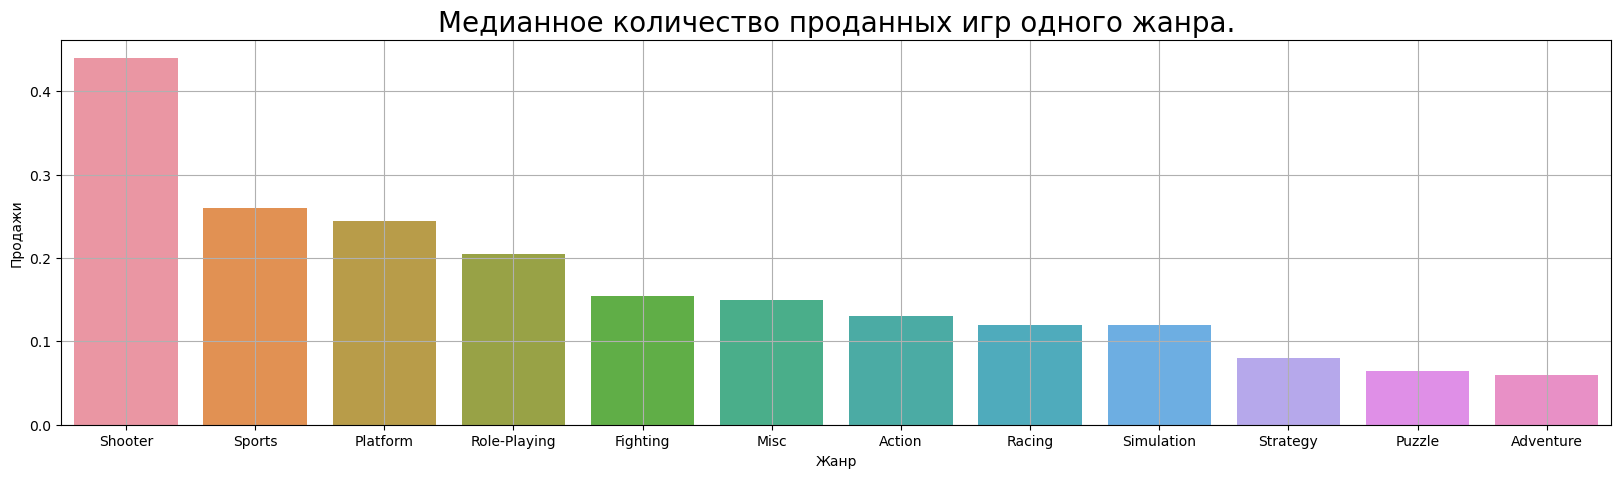

In [68]:
all_genre_median = df_platform.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä –æ–¥–Ω–æ–≥–æ –∂–∞–Ω—Ä–∞.', fontsize=20)
sns.barplot(x=all_genre_median['genre'], y=all_genre_median['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);
all_genre_median

genre  total_sales
0         Action       211.11
1        Shooter       169.30
2   Role-Playing       135.38
3         Sports        93.00
4       Platform        49.40
5           Misc        38.26
6         Racing        31.31
7     Simulation        31.27
8       Fighting        25.95
9      Adventure        14.36
10      Strategy         9.54
11        Puzzle         4.03

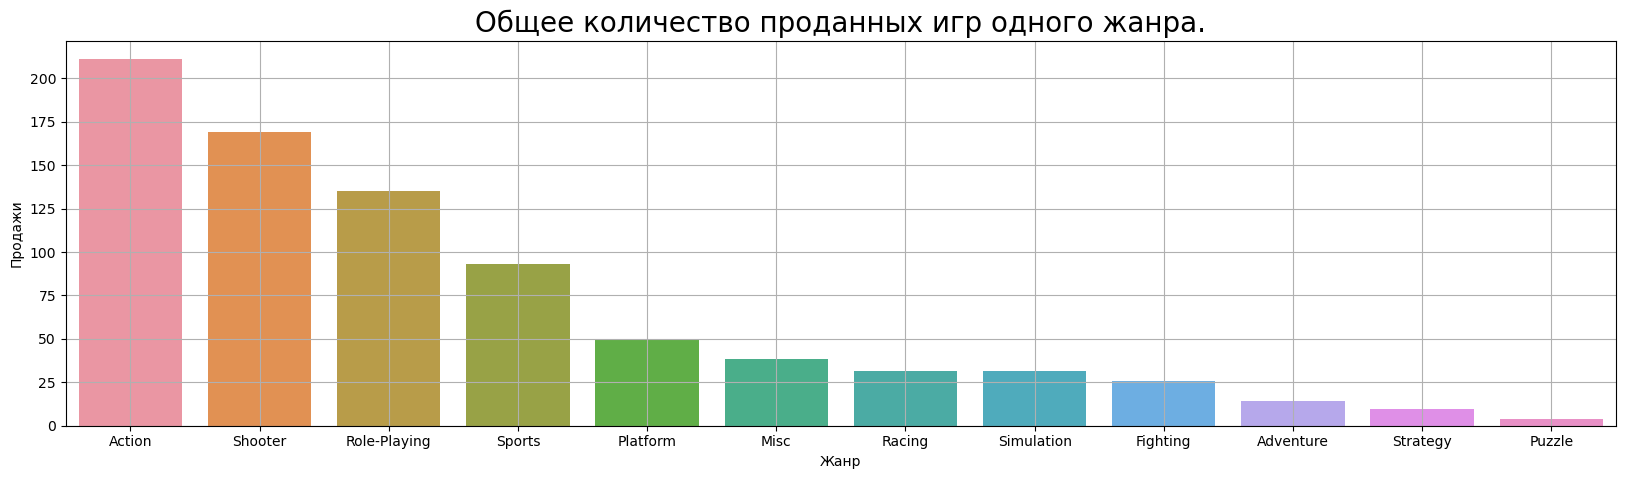

In [69]:
all_genre_sum = df_platform.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä –æ–¥–Ω–æ–≥–æ –∂–∞–Ω—Ä–∞.', fontsize=20)
sns.barplot(x=all_genre_sum['genre'], y=all_genre_sum['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);
all_genre_sum

**–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è –ø–æ –º–µ–¥–∏–∞–Ω–µ.**
* –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∂–∞–Ω—Ä - Shoote", —É –Ω–µ–≥–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞–∂, –∞ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ —É Adventure	.

* –ù–∞–∏–±–æ–ª—å—à—É—é –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∏–º–µ—é—Ç –∂–∞–Ω—Ä—ã: Shooter, Sports, Platform, Role-Playing. –£ –Ω–∏—Ö –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂ —Å –æ—Ç—Ä—ã–≤–æ–º –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

**–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è –ø–æ —Å—É–º–º–µ.**
* –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∂–∞–Ω—Ä - Action, —É –Ω–µ–≥–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞–∂, –∞ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ —É Puzzle.

* –ù–∞–∏–±–æ–ª—å—à—É—é –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∏–º–µ—é—Ç –∂–∞–Ω—Ä—ã: Action, Shooter, Role-Playing	, Sports. –£ –Ω–∏—Ö –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂ —Å –æ—Ç—Ä—ã–≤–æ–º –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–æ –≤—Å–µ–º –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 5 –ª–µ—Ç.

genre  total_sales
0        Shooter        0.440
1         Sports        0.240
2       Platform        0.210
3   Role-Playing        0.140
4         Racing        0.140
5       Fighting        0.130
6         Action        0.120
7           Misc        0.120
8     Simulation        0.120
9       Strategy        0.080
10        Puzzle        0.045
11     Adventure        0.030

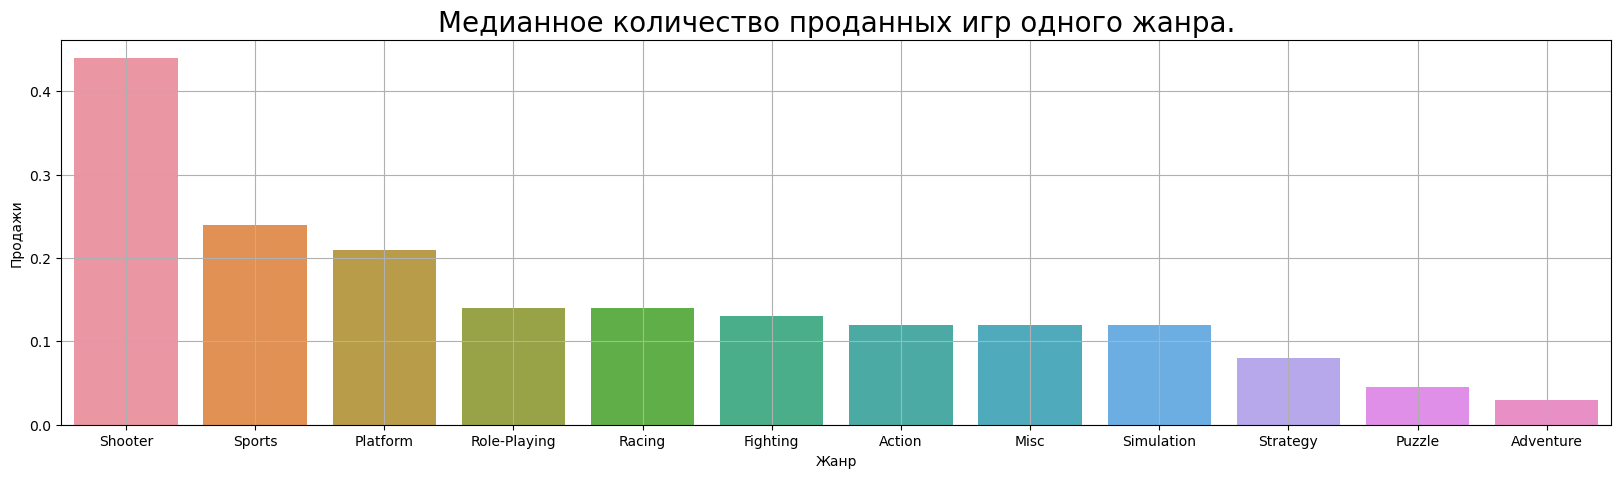

In [70]:
all_genre_median_five = df_forecast.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä –æ–¥–Ω–æ–≥–æ –∂–∞–Ω—Ä–∞.', fontsize=20)
sns.barplot(x=all_genre_median_five['genre'], y=all_genre_median_five['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);
all_genre_median_five

genre  total_sales
0         Action       441.12
1        Shooter       304.73
2   Role-Playing       192.80
3         Sports       181.06
4           Misc        85.04
5       Platform        61.00
6         Racing        53.50
7       Fighting        44.49
8     Simulation        35.12
9      Adventure        29.43
10      Strategy        13.34
11        Puzzle         4.89

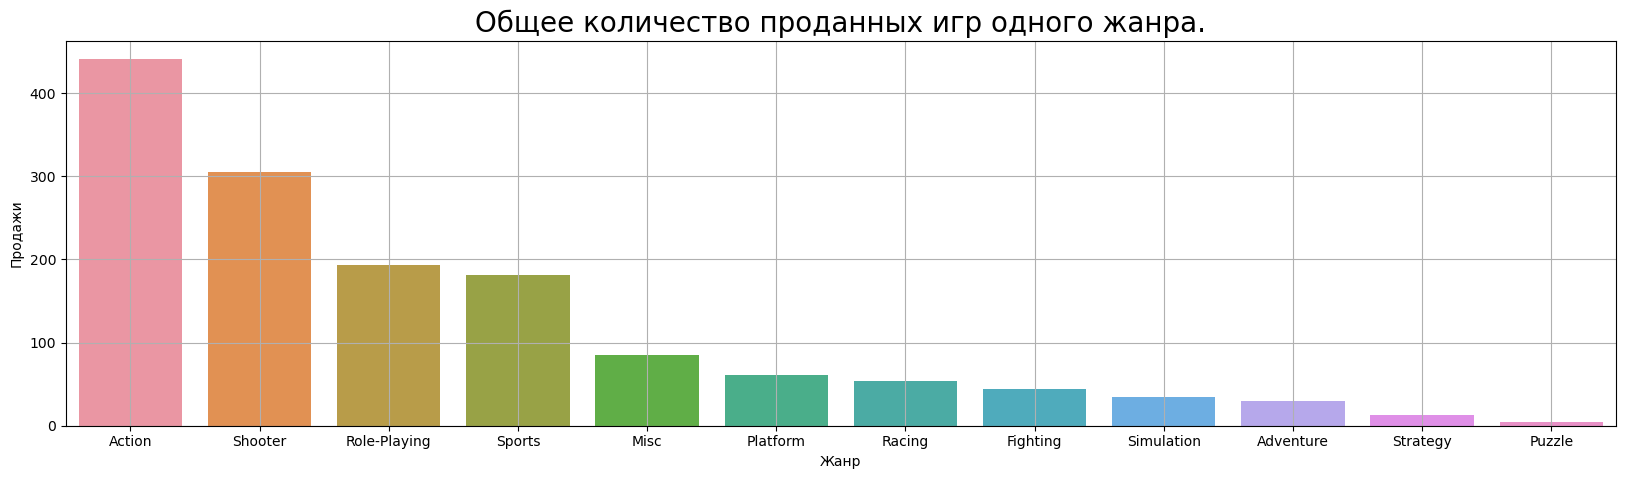

In [71]:
all_genre_sum_five = df_forecast.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä –æ–¥–Ω–æ–≥–æ –∂–∞–Ω—Ä–∞.', fontsize=20)
sns.barplot(x=all_genre_sum_five['genre'], y=all_genre_sum_five['total_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);
all_genre_sum_five

**–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è –ø–æ –º–µ–¥–∏–∞–Ω–µ.**
* –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∂–∞–Ω—Ä - Shoote", —É –Ω–µ–≥–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞–∂, –∞ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ —É Adventure	.

* –ù–∞–∏–±–æ–ª—å—à—É—é –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∏–º–µ—é—Ç –∂–∞–Ω—Ä—ã: Shooter, Sports, Platform, Role-Playing. –£ –Ω–∏—Ö –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂ —Å –æ—Ç—Ä—ã–≤–æ–º –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

**–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è –ø–æ —Å—É–º–º–µ.**
* –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π –∂–∞–Ω—Ä - Action, —É –Ω–µ–≥–æ –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ–¥–∞–∂, –∞ –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ —É Puzzle.

* –ù–∞–∏–±–æ–ª—å—à—É—é –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∏–º–µ—é—Ç –∂–∞–Ω—Ä—ã: Action, Shooter, Role-Playing	, Sports. –£ –Ω–∏—Ö –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂ —Å –æ—Ç—Ä—ã–≤–æ–º –æ—Ç –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

**–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è –ø—Ä–æ–¥–∞–∂–∏ —Ç–æ–ø 5 –ø–ª–∞—Ç—Ñ–æ—Ä–º –∏ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ 5 –ª–µ—Ç –≤–∏–¥–Ω–æ, —á—Ç–æ —Ç–µ–Ω–¥–µ–Ω—Ü–∏—è –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ—Ö—Ä–∞–Ω—è–µ—Ç—Å—è. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ, –∂–∞–Ω—Ä –∏–≥—Ä Action –ø–æ —Å—É–º–º–µ —Å—Ç–∞–ª –Ω–∞–º–Ω–æ–≥–æ —è—Ä—á–µ –≤—ã–¥–µ–ª—è—Ç—å—Å—è, —á—Ç–æ –≤ –æ—á–µ—Ä–µ–¥–Ω–æ–π —Ä–∞–∑ –¥–æ–∫–∞–∑—ã–≤–∞–µ—Ç –µ–≥–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å.**

**–í—ã–≤–æ–¥:**
* –°—Ä–µ–¥–Ω–∏–π —Å—Ä–æ–∫ –∂–∏–∑–Ω–∏ –∫–æ–Ω—Å–æ–ª–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 11 –ª–µ—Ç.
* –ü–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–º–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞–º–∏ –Ω–∞ –ø–µ—Ä–∏–æ–¥ —Å 2017 –≥–æ–¥–∞ —Å—á–∏—Ç–∞—é: 3DS, XONE, PS4, WIIU. –û–Ω–∏ –ø–æ—è–≤–∏–ª–∏—Å—å –Ω–µ–¥–∞–≤–Ω–æ, –∏ –∏–º–µ—é—Ç –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –¥–∏–Ω–∞–º–∏–∫—É —Ä–æ—Å—Ç–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ–¥–∞–Ω–Ω—ã—Ö –∏–≥—Ä. PC –Ω–∞ –≤—Å–µ –≤—Ä–µ–º–µ–Ω–∞ –æ—Ç—Å—Ç–∞–≤–∞–ª—Å—è —Å—Ç–∞–±–∏–ª—å–Ω–æ–π –ø–ª–∞—Ç—Ñ–æ—Ä–º–æ–π. –û—Ç–¥–µ–ª—å–Ω–æ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å XONE, PS4. –û—Ü–µ–Ω–∏–≤–∞—è –ø—Ä–æ–¥–∞–∂–∏ –∏–≥—Ä –Ω–∞ –∏—Ö –ø—Ä–µ–¥—à–µ—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞—Ö X360 –∏ PS3 –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —ç—Ç–æ –±—É–¥—É—Ç –¥–≤–∞ –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞.
* –ú–Ω–µ–Ω–∏—è –∫—Ä–∏—Ç–∏–∫–æ–≤ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂, —Ö–æ—Ç—å –∏ –Ω–µ —Å–∏–ª—å–Ω–æ. –ú–Ω–µ–Ω–∏–µ –∏–≥—Ä–æ–∫–æ–≤ –Ω–∏–∫–∞–∫ –æ—Å–æ–±–æ –Ω–µ –≤–ª–∏—è–µ—Ç, —É—á–∏—Ç—ã–≤–∞—è —Ç–æ—Ç —Ñ–∞–∫—Ç, —á—Ç–æ –µ–º—É –Ω—É–∂–Ω–æ —Å–Ω–∞—á–∞–ª–∞ –∫—É–ø–∏—Ç—å –∏–≥—Ä—É, –∞ —É–∂–µ –ø–æ—Ç–æ–º –¥–∞—Ç—å –æ—Ü–µ–Ω–∫—É)))
* –ñ–∞–Ω—Ä –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—Ç–µ. –ò–≥—Ä–æ–∫–∏ –±–æ–ª—å—à–µ —Ü–µ–Ω—è—Ç:  Action, Shooter, Role-Playing , Sports, Platform.

# –°–æ—Å—Ç–∞–≤–∏–º –ø–æ—Ä—Ç—Ä–µ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≥–∏–æ–Ω–∞.

**–°–µ–≤–µ—Ä–Ω–∞—è –∞–º–µ—Ä–∏–∫–∞**

–¢–æ–ø-5 –ø–ª–∞—Ç—Ñ–æ—Ä–º.

platform  na_sales
9      X360    140.05
4       PS4    108.74
3       PS3    103.38
10     XOne     93.12
0       3DS     55.31

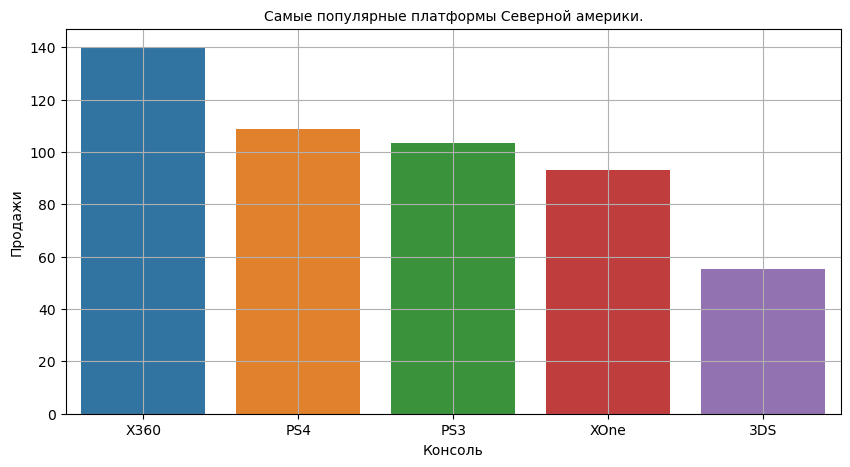

In [72]:
na_platform = (df_forecast
 .groupby('platform')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –°–µ–≤–µ—Ä–Ω–æ–π –∞–º–µ—Ä–∏–∫–∏.', fontsize=10)
sns.barplot(x=na_platform['platform'], y=na_platform['na_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ö–æ–Ω—Å–æ–ª—å')
plt.grid(True);

na_platform

–¢–æ–ø –∂–∞–Ω—Ä—ã.

genre  na_sales
0         Action    177.84
8        Shooter    144.77
10        Sports     81.53
7   Role-Playing     64.00
3           Misc     38.19

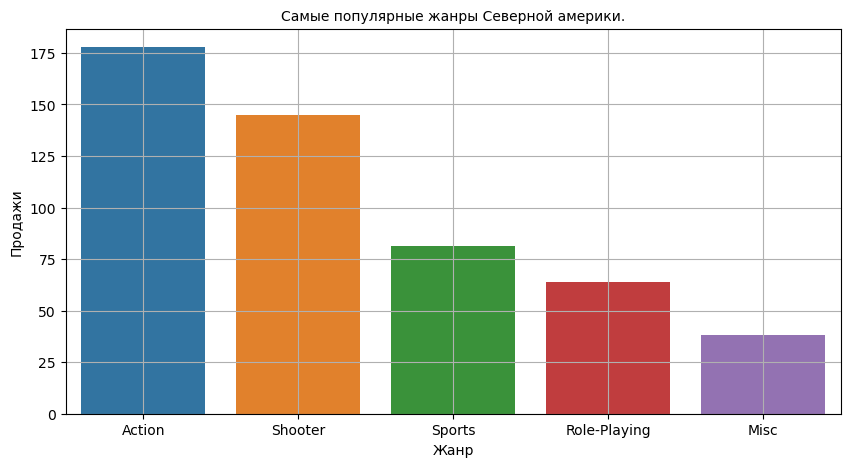

In [73]:
na_genre = (df_forecast
 .groupby('genre')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã –°–µ–≤–µ—Ä–Ω–æ–π –∞–º–µ—Ä–∏–∫–∏.', fontsize=10)
sns.barplot(x=na_genre['genre'], y=na_genre['na_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);
na_genre


–¢–æ–ø —Ä–µ–π—Ç–∏–Ω–≥ –∏–≥—Ä.

rating  na_sales
2      M    231.57
0      E    114.37
3     NR    103.31
1   E10+     75.70
4      T     66.02

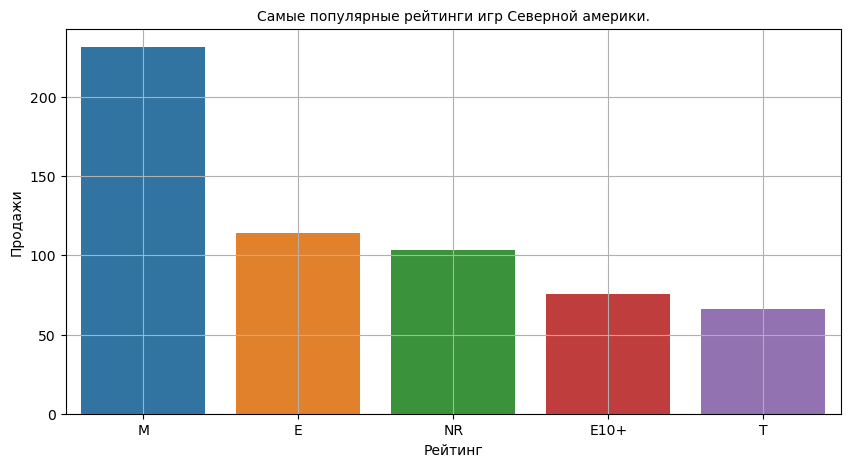

In [74]:
na_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['na_sales']
 .sum()
 .reset_index()
 .sort_values(by='na_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∏–≥—Ä –°–µ–≤–µ—Ä–Ω–æ–π –∞–º–µ—Ä–∏–∫–∏.', fontsize=10)
sns.barplot(x=na_rating['rating'], y=na_rating['na_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–†–µ–π—Ç–∏–Ω–≥')
plt.grid(True);

na_rating


* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –°–µ–≤–µ—Ä–Ω–æ–π –∞–º–µ—Ä–∏–∫–µ X360, PS4, PS3.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Action, Shooter, Sports, Role-Playing, Misc.
* –° –±–æ–ª—å—à–∏–º –æ—Ç—Ä—ã–≤–æ–º –ø–æ –ø—Ä–æ–¥–∞–∂–∞–º –ª–∏–¥–∏—Ä—É–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ –ú, –∑–∞—Ç–µ–º –∏–¥—É—Ç –ï –∏ RT.

**–ï–≤—Ä–æ–ø–∞.**

–¢–æ–ø-5 –ø–ª–∞—Ç—Ñ–æ—Ä–º.

platform  eu_sales
4       PS4    141.09
3       PS3    106.85
9      X360     74.52
10     XOne     51.59
0       3DS     42.64

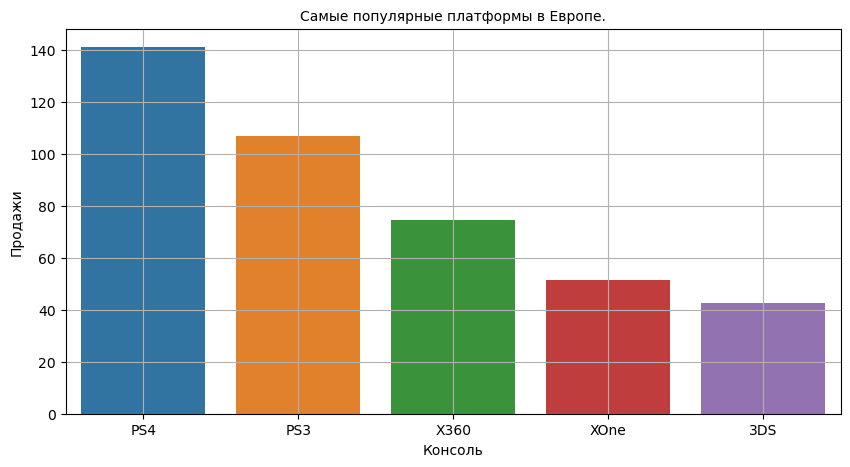

In [75]:
eu_platform = (df_forecast
 .groupby('platform')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –ï–≤—Ä–æ–ø–µ.', fontsize=10)
sns.barplot(x=eu_platform['platform'], y=eu_platform['eu_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ö–æ–Ω—Å–æ–ª—å')
plt.grid(True);

eu_platform

–¢–æ–ø-5 –∂–∞–Ω—Ä–æ–≤.

genre  eu_sales
0         Action    159.34
8        Shooter    113.47
10        Sports     69.08
7   Role-Playing     48.53
6         Racing     27.29

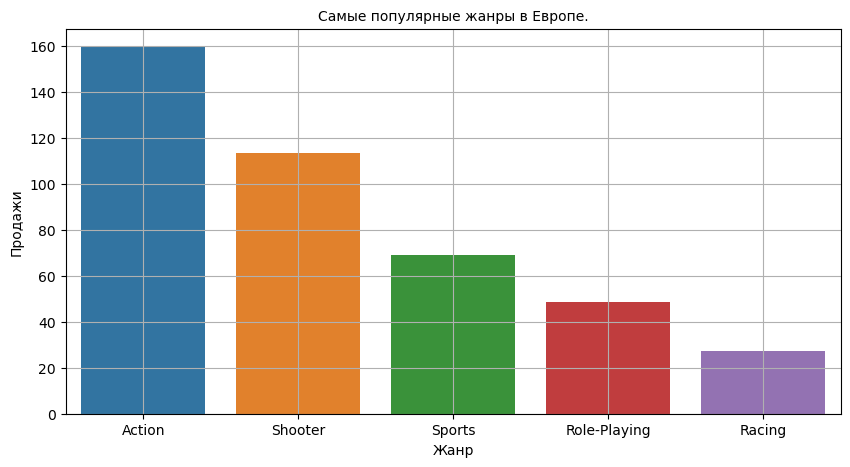

In [76]:
eu_genre = (df_forecast
 .groupby('genre')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã –≤ –ï–≤—Ä–æ–ø–µ.', fontsize=10)
sns.barplot(x=eu_genre['genre'], y=eu_genre['eu_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);

eu_genre

–¢–æ–ø —Ä–µ–π—Ç–∏–Ω–≥.

rating  eu_sales
2      M    193.96
0      E    113.02
3     NR     91.50
1   E10+     55.37
4      T     52.96

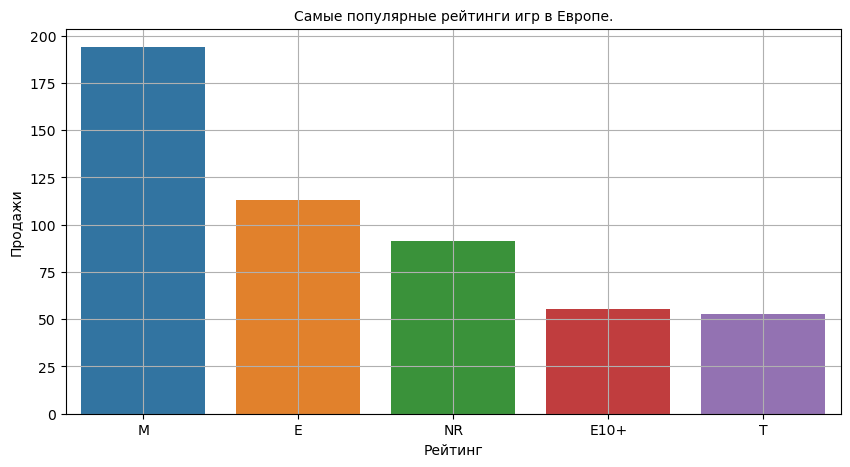

In [77]:
eu_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['eu_sales']
 .sum()
 .reset_index()
 .sort_values(by='eu_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∏–≥—Ä –≤ –ï–≤—Ä–æ–ø–µ.', fontsize=10)
sns.barplot(x=eu_rating['rating'], y=eu_rating['eu_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–†–µ–π—Ç–∏–Ω–≥')
plt.grid(True);

eu_rating

* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –ï–≤—Ä–æ–ø–µ PS4, PS3, X360
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Action, Shooter, Sports, Role-Playing, Racing
* –ü–æ –ø—Ä–æ–¥–∞–∂–∞–º –ª–∏–¥–∏—Ä—É–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ –ú, –∑–∞—Ç–µ–º –∏–¥—É—Ç –ï –∏ NR.

**–Ø—Ä–æ–Ω–∏—è.**

–¢–æ–ø-5 –ø–ª–∞—Ç—Ñ–æ—Ä–º.

platform  jp_sales
0      3DS     87.79
3      PS3     35.29
6      PSV     21.04
4      PS4     15.96
8     WiiU     13.01

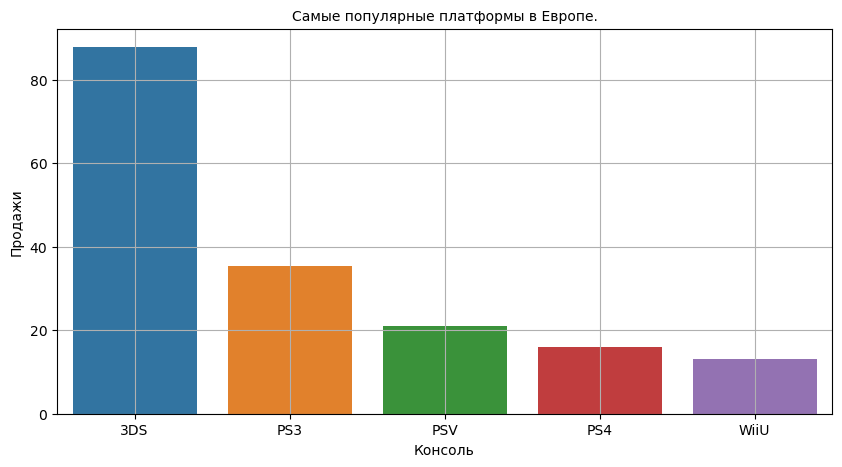

In [78]:
jp_platform = (df_forecast
 .groupby('platform')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –ï–≤—Ä–æ–ø–µ.', fontsize=10)
sns.barplot(x=jp_platform['platform'], y=jp_platform['jp_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ö–æ–Ω—Å–æ–ª—å')
plt.grid(True);

jp_platform

–¢–æ–ø-5 –∂–∞–Ω—Ä–æ–≤.

genre  jp_sales
7  Role-Playing     65.44
0        Action     52.80
3          Misc     12.86
9    Simulation     10.41
2      Fighting      9.44

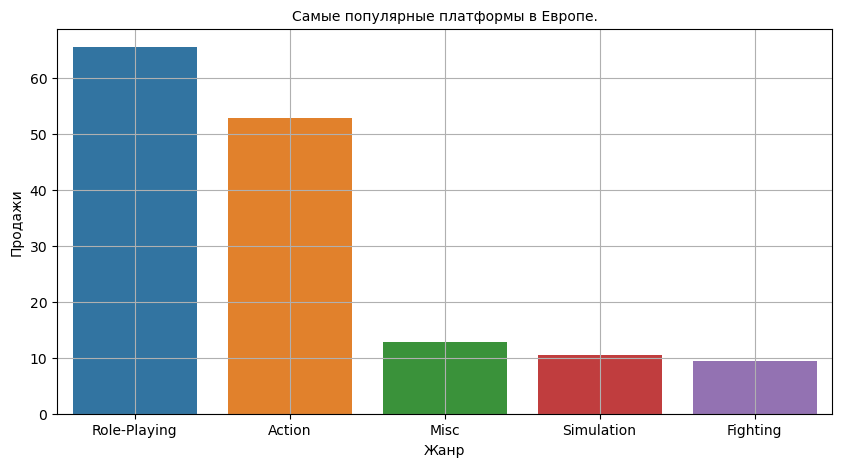

In [79]:
jp_genre = (df_forecast
 .groupby('genre')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –ï–≤—Ä–æ–ø–µ.', fontsize=10)
sns.barplot(x=jp_genre['genre'], y=jp_genre['jp_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);

jp_genre

–¢–æ–ø —Ä–µ–π—Ç–∏–Ω–≥.

rating  jp_sales
3     NR    108.84
0      E     28.33
4      T     26.02
2      M     21.20
1   E10+      8.19

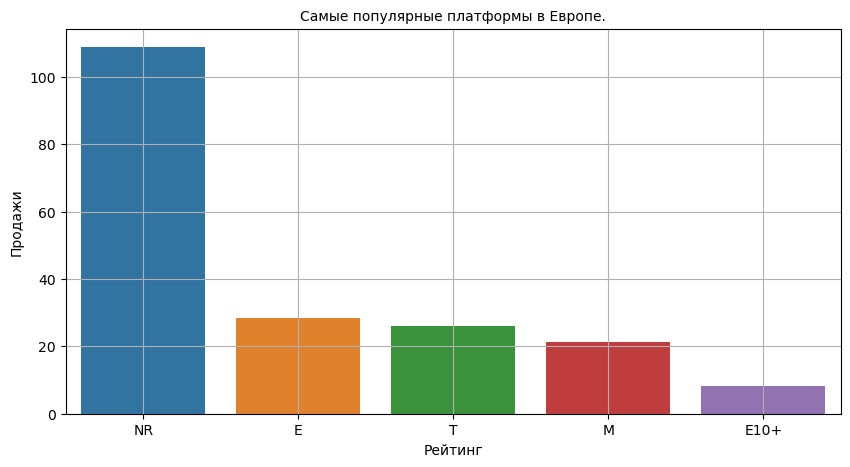

In [80]:
jp_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['jp_sales']
 .sum()
 .reset_index()
 .sort_values(by='jp_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –ï–≤—Ä–æ–ø–µ.', fontsize=10)
sns.barplot(x=jp_rating['rating'], y=jp_rating['jp_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–†–µ–π—Ç–∏–Ω–≥')
plt.grid(True);

jp_rating

* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –Ø–ø–æ–Ω–∏–∏ 3DS, PS3, PSV.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Role-Playing Action Misc Simulation Fighting.
* –ü–æ –ø—Ä–æ–¥–∞–∂–∞–º –ª–∏–¥–∏—Ä—É–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ NR, –∑–∞—Ç–µ–º –∏–¥—É—Ç –ï –∏ T.

**–î—Ä—É–≥–∏–µ —Å—Ç—Ä–∞–Ω—ã.**

–¢–æ–ø-5 –ø–ª–∞—Ç—Ñ–æ—Ä–º.

platform  other_sales
4       PS4        48.35
3       PS3        43.26
9      X360        20.40
10     XOne        14.27
0       3DS         8.87

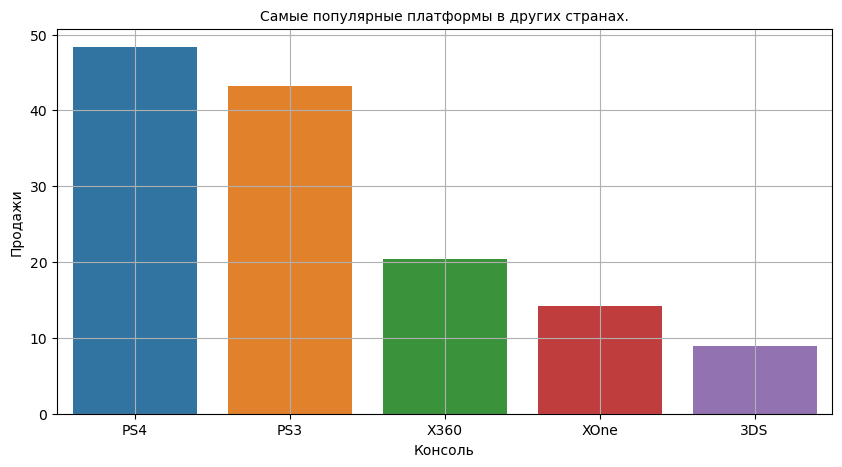

In [81]:
other_platform = (df_forecast
 .groupby('platform')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –¥—Ä—É–≥–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö.', fontsize=10)
sns.barplot(x=other_platform['platform'], y=other_platform['other_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ö–æ–Ω—Å–æ–ª—å')
plt.grid(True);

other_platform

–¢–æ–ø-5 –∂–∞–Ω—Ä–æ–≤.

genre  other_sales
0         Action        51.14
8        Shooter        37.26
10        Sports        22.44
7   Role-Playing        14.83
3           Misc         7.67

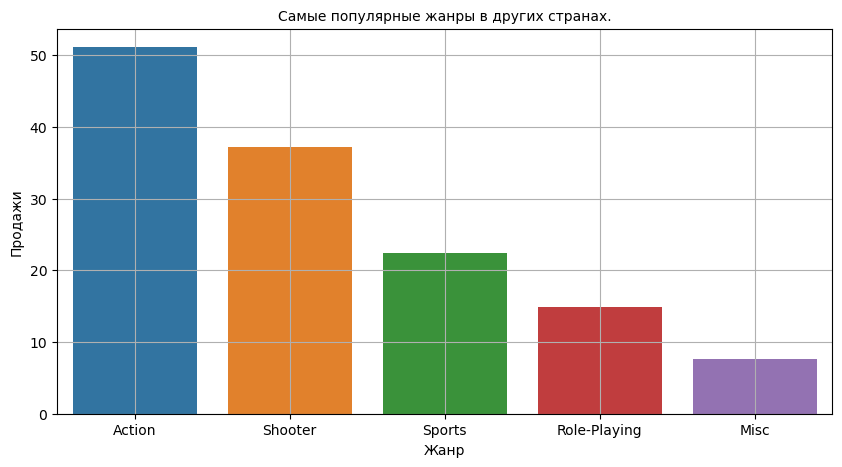

In [82]:
other_genre = (df_forecast
 .groupby('genre')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã –≤ –¥—Ä—É–≥–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö.', fontsize=10)
sns.barplot(x=other_genre['genre'], y=other_genre['other_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–ñ–∞–Ω—Ä')
plt.grid(True);

other_genre

–¢–æ–ø —Ä–µ–π—Ç–∏–Ω–≥.

rating  other_sales
2      M        63.38
0      E        31.44
3     NR        27.17
4      T        17.94
1   E10+        16.23

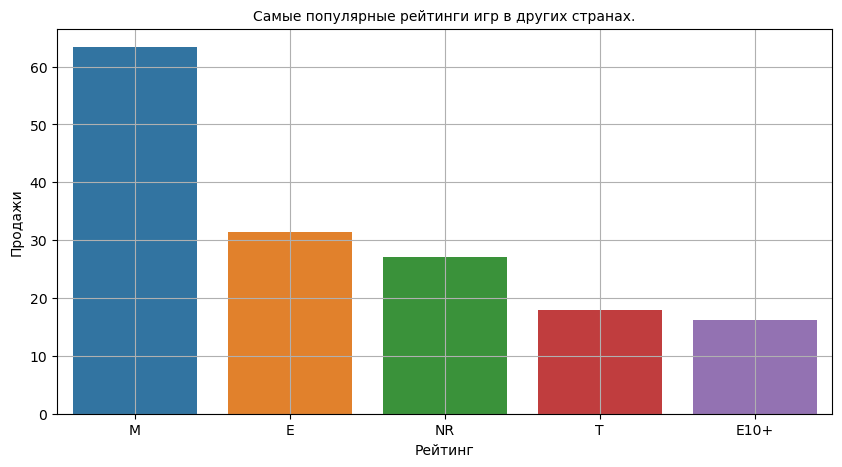

In [83]:
other_rating = (df_forecast
 .query('rating != "-1"')
 .groupby('rating')['other_sales']
 .sum()
 .reset_index()
 .sort_values(by='other_sales', ascending=False)
 .head(5)
)
plt.figure(figsize=(10, 5))
plt.title('–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∏–≥—Ä –≤ –¥—Ä—É–≥–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö.', fontsize=10)
sns.barplot(x=other_rating['rating'], y=other_rating['other_sales'])
plt.ylabel('–ü—Ä–æ–¥–∞–∂–∏')
plt.xlabel('–†–µ–π—Ç–∏–Ω–≥')
plt.grid(True);

other_rating

* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è —Å—Ç—Ä–∞–Ω–∞—Ö PS4, PS3, X360.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Action, Shooter, Sports, Role-Playing,Misc/
* –ü–æ –ø—Ä–æ–¥–∞–∂–∞–º –ª–∏–¥–∏—Ä—É–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ –ú, –∑–∞—Ç–µ–º –∏–¥—É—Ç –ï –∏ NR.

**–í—ã–≤–æ–¥:**

**–°–µ–≤–µ—Ä–Ω–∞—è –ê–º–µ—Ä–∏–∫–∞.**
* –¢–æ–ª—å–∫–æ –≤ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ —Å–∞–º–∞—è –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–æ–Ω—Å–æ–ª—å X360. –ß—Ç–æ –ª–æ–≥–∏—á–Ω–æ, —Ç.–∫. –∫–æ–º–ø–∞–Ω–∏—è Microsoft, —è–≤–ª—è–µ—Ç—Å—è –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–π –∏ –°–µ–≤–µ—Ä–Ω–∞—è –∞–º–µ—Ä–∏–∫–∞ –ø–æ —Å—É—Ç–∏ —è–≤–ª—è–µ—Ç—Å—è –º–µ—Å—Ç–Ω—ã–º —Ä—ã–Ω–∫–æ–º —Å–±—ã—Ç–∞.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Action, Shooter, Sports. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π —Ä—ã–Ω–æ–∫ –≥–¥–µ –≤ –¢–æ–ø 5 –∂–∞–Ω—Ä–æ–≤ –≤—Ö–æ–¥–∏—Ç Misc.
* –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ –ú.

**–ï–≤—Ä–æ–ø–∞**
* –í –ï–≤—Ä–æ–ø–µ —É–∂–µ PS4 –ø–æ–ª–Ω–æ—Å—Ç—å—é –∑–∞—Ö–≤–∞—Ç–∏–ª —Ä—ã–Ω–æ–∫ –æ–ø–µ—Ä–µ–∂–∞—è —Å–≤–æ–µ–≥–æ –≥–ª–∞–≤–Ω–æ–≥–æ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–∞ XOne –ø–æ—á—Ç–∏ –≤ 3 —Ä–∞–∑–∞.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Action, Shooter, Sports. –¢–∞–∫ –∂–µ –æ—á–µ–Ω—å –ø–æ–ø—É–ª—è—Ä–µ–Ω –∂–∞–Ω—Ä –≥–æ–Ω–æ–∫ (Racing).
* –ü–æ –ø—Ä–æ–¥–∞–∂–∞–º –ª–∏–¥–∏—Ä—É—é—Ç –∏–≥—Ä—ã —Ä–µ–π—Ç–∏–Ω–≥–∞ –ú, –∫–∞–∫ –∏ –≤ –°–µ–≤–µ—Ä–Ω–æ–π –ê–º–µ—Ä–∏–∫–µ.

**–Ø–ø–æ–Ω–∏—è**
* –°—Ç—Ä–∞–Ω–∞ —É –∫–æ—Ç–æ—Ä–æ–π –≤—Å–µ –ø–æ –¥—Ä—É–≥–æ–º—É.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –∫–æ–Ω—Å–æ–ª—å 3DS. –¢–∞–∫ –∂–µ –≤ 3 –≤—Ö–æ–¥–∏—Ç –∏ PSV.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Role-Playing, Action, Misc, Simulation. –í–º–µ—Å—Ç–æ –ï–≤—Ä–æ–ø–µ–π—Å–∫–∏—Ö –≥–æ–Ω–æ–∫ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç –∂–∞–Ω—Ä –¥—Ä–∞–∫–∏ (Fighting).
* –ü—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç –∏–≥—Ä—ã —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º NR.

**–î—Ä—É–≥–∏–µ —Å—Ç—Ä–∞–Ω—ã.**
* –í—Å–µ –æ—á–µ–Ω—å –ø–æ—Ö–æ–∂–µ –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏, –∫–∞–∫ –≤ –ï–≤—Ä–æ–ø–µ–π—Å–∫–∏—Ö —Å—Ç—Ä–∞–Ω–∞—Ö.

<font color='DarkBlue'><b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞</b></font><br>
<font color='DarkGreen'>üëå –í–æ—Ç —Ç–∞–∫–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –±—ã–ª–∞ —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º. <br>
–ê –¥–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ –µ—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –∏–Ω–µ—Ç–µ, —á—Ç–æ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ ESRB, —Ç–æ –æ–∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –æ–Ω –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω –¥–ª—è –º–∞—Ä–∫–∏—Ä–æ–≤–∫–∏ –∏–≥—Ä –¥–ª—è –°–®–ê –∏ –ö–∞–Ω–∞–¥—ã. –ò –ª–æ–≥–∏—á–Ω–æ, —á—Ç–æ –¥–ª—è –¥—Ä—É–≥–∏—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ –æ–Ω –Ω–µ –∑–∞–ø–æ–ª–Ω—è–µ—Ç—Å—è. –ê –≤ –Ø–ø–æ–Ω–∏–∏ –µ—Å—Ç—å —Å–≤–æ–π —Ä–µ–π—Ç–∏–Ω–≥, —Å–≤–æ–π —Ä–µ–π—Ç–∏–Ω–≥ –µ—Å—Ç—å –≤ –ï–° –∏ –æ—Ç–¥–µ–ª—å–Ω–æ –≤ –ì–µ—Ä–º–∞–Ω–∏–∏, –ê–≤—Å—Ç—Ä–∞–ª–∏–∏ –∏ —Ç.–¥., –Ω–æ –ø–æ –Ω–∏–º –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ—Ç –¥–∞–Ω–Ω—ã—Ö. –¢–æ –µ—Å—Ç—å, –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –ø—Ä–æ–ø—É—Å–∫ –∏–º–µ–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫, —á—Ç–æ –∏–≥—Ä–∞ –≤—ã–ø—É—â–µ–Ω–∞ –Ω–µ –≤ –°–µ–≤–µ—Ä–æ-–ê–º–µ—Ä–∏–∫–∞–Ω—Å–∫–æ–º —Ä–µ–≥–∏–æ–Ω–µ. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ —à–∏—Ä–µ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç, —Ç–∞–∫ –∫–∞–∫ –∑–∞ —Ü–∏—Ñ—Ä–∞–º–∏ –Ω–∞—Ö–æ–¥—è—Ç—Å—è —Ä–µ–∞–ª—å–Ω—ã–µ –±–∏–∑–Ω–µ—Å-–ø—Ä–æ—Ü–µ—Å—Å—ã. –≠—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –ø—Ä–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö.</font>

# –ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—ã.

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–∏–∑, –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å.
–ì–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–≤–µ–Ω—Å—Ç–≤–µ —Å—Ä–µ–¥–Ω–∏—Ö –¥–≤—É—Ö –≥–µ–Ω–µ—Ä–∞–ª—å–Ω—ã—Ö —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–µ–π.
–û—Å–Ω–æ–≤–Ω—ã–µ –∞—Å–ø–µ–∫—Ç—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–¥–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –º–æ–∂–Ω–æ –ª–∏ –ø—Ä–∏–º–µ–Ω—è—Ç—å t-—Ç–µ—Å—Ç:
* –ì–µ–Ω–µ—Ä–∞–ª—å–Ω—ã–µ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ –Ω–µ –¥–æ–ª–∂–Ω—ã –∑–∞–≤–∏—Å–µ—Ç—å –¥—Ä—É–≥ –æ—Ç –¥—Ä—É–≥–∞.
* –í—ã–±–æ—Ä–æ—á–Ω—ã–µ —Å—Ä–µ–¥–Ω–∏–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã.

**–°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ**

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –Ω—É–ª–µ–≤—É—é –∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—ã. –ù—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –±—É–¥–µ–º —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞—Ç—å —Ç–∞–∫, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∑–Ω–∞–∫ —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞. –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É —Å—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –æ—Ç—Ç–∞–∫–ª–∏–≤–∞—è—Å—å –æ—Ç –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã.

* H‚ÇÄ - —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC —Ä–∞–≤–Ω—ã
* H‚ÇÅ - —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –ø–ª–∞—Ç—Ñ–æ—Ä–º Xbox One –∏ PC –Ω–µ —Ä–∞–≤–Ω—ã

In [84]:
alpha = .05

In [85]:
x_one = df_forecast.query('platform == "XOne" and user_score != -1')
pc = df_forecast.query('platform == "PC" and user_score != -1')

<font color='DarkBlue'><b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞</b></font><br>
<font color='Red'>üõ† –ù–µ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω—ã –∑–∞–≥–ª—É—à–∫–∏.</font>


<font color='Blue'> –ò—Å–ø—Ä–∞–≤–ª–µ–Ω–æ.

In [86]:
# –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞
x_one.user_score.min(), pc.user_score.min()

(1.6, 1.4)

(<AxesSubplot:>, <AxesSubplot:>)

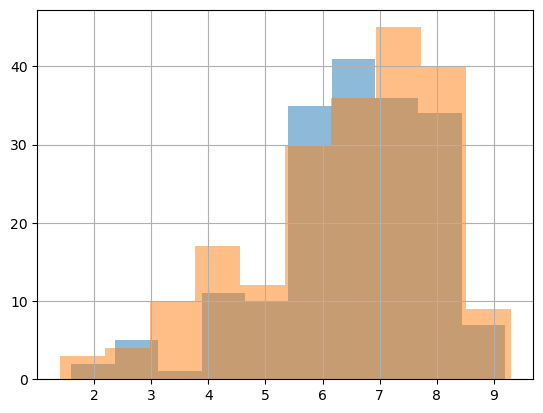

In [87]:
x_one['user_score'].hist(alpha = .5), pc['user_score'].hist(alpha = .5)

In [88]:
results = st.ttest_ind(x_one['user_score'],pc['user_score'])

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

if (results.pvalue < alpha):
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

print()
print('C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∫–æ–Ω—Å–æ–ª–∏ Xbox One -', round(x_one['user_score'].mean(),2))
print('C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∫–æ–Ω—Å–æ–ª–∏ PC -', round(pc['user_score'].mean(),2))

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 0.5535080500643661
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É

C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∫–æ–Ω—Å–æ–ª–∏ Xbox One - 6.52
C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∫–æ–Ω—Å–æ–ª–∏ PC - 6.43


**–í—ã–≤–æ–¥.**
* –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∫–æ–Ω—Å–æ–ª–µ–π Xbox One –∏ PC —Ä–∞–≤–Ω—ã.

*  –ü–æ—Å–ª–µ –ø—Ä–∏–Ω—è—Ç–∏—è –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π —É—Ä–æ–≤–µ–Ω—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤ 5%, –≥–∏–ø–æ—Ç–µ–∑—É —Å–ª–µ–¥—É–µ—Ç –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞—Ç—å. –ó–Ω–∞—á–µ–Ω–∏–µ p-value –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–µ. –û—Ü–µ–Ω–∫–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –Ω–∞ —ç—Ç–∏—Ö –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞—Ö –Ω–µ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.

–í–µ–¥—å –ø–æ–ª—å–∑–∞–≤–∞—Ç–µ–ª–∏ –æ—Ü–µ–Ω–∏–≤–∞—é—Ç —Å–∞–º—É –∏–≥—Ä—É(—Å—é–∂–µ—Ç, –≥—Ä–∞—Ñ–∏–∫–∞, –∫–∞—á–µ—Å—Ç–≤–æ –∏–≥—Ä—ã), –∞ –Ω–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—É –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π –∏–≥—Ä–∞—é—Ç. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ –Ω–∞ —á—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –æ—Ü–µ–Ω–∫—É –∫–æ–Ω—Å–æ–ª—å —ç—Ç–æ –Ω–∞ —Å–∫–æ–ª—å–∫–æ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞ –ø–æ–¥ –Ω–µ–µ –∏–≥—Ä–∞. –í–µ–¥—å –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é –Ω–∞ PC –º—ã—à—å –∏ –∫–ª–∞–≤–∏–∞—Ç—É—Ä—ã, –∞ –Ω–∞ Xbox One –¥–∂–æ—Å—Ç–∏–∫.

**–°—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action (–∞–Ω–≥–ª. ¬´–¥–µ–π—Å—Ç–≤–∏–µ¬ª, —ç–∫—à–µ–Ω-–∏–≥—Ä—ã) –∏ Sports (–∞–Ω–≥–ª. ¬´—Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ —Å–æ—Ä–µ–≤–Ω–æ–≤–∞–Ω–∏—è¬ª) —Ä–∞–∑–Ω—ã–µ.**

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –Ω—É–ª–µ–≤—É—é –∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—ã. –ù—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É –±—É–¥–µ–º —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞—Ç—å —Ç–∞–∫, —á—Ç–æ–±—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∑–Ω–∞–∫ —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞. –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—É—é –≥–∏–ø–æ—Ç–µ–∑—É —Å—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –æ—Ç—Ç–∞–∫–ª–∏–≤–∞—è—Å—å –æ—Ç –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã.

* H‚ÇÄ - —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action –∏ Sports —Ä–∞–≤–Ω—ã
* H‚ÇÅ - —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action –∏ Sports –Ω–µ —Ä–∞–≤–Ω—ã

In [89]:
alpha = .05

In [90]:
action = df_forecast.query('genre == "Action" and user_score != -1')
sports = df_forecast.query('genre == "Sports" and user_score != -1')


In [91]:
action['user_score'].min(), sports['user_score'].min()

(1.6, 0.2)

(<AxesSubplot:>, <AxesSubplot:>)

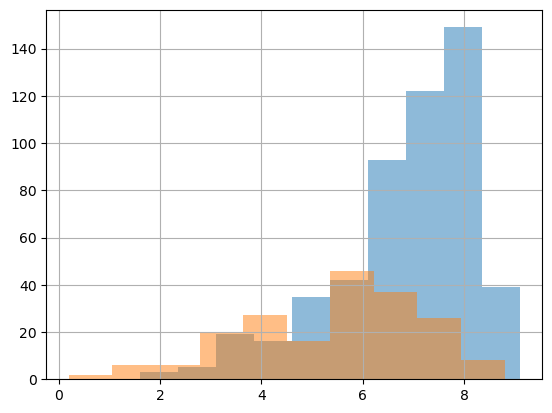

In [92]:
action['user_score'].hist(alpha = .5), sports['user_score'].hist(alpha = .5)

In [93]:
results = st.ttest_ind(action['user_score'],sports['user_score'])

print('p-–∑–Ω–∞—á–µ–Ω–∏–µ:', results.pvalue)

if (results.pvalue < alpha):
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

print()
print('C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∂–∞–Ω—Ä–∞ Action -', round(action['user_score'].mean(),2))
print('C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∂–∞–Ω—Ä–∞ Sports -', round(sports['user_score'].mean(),2))

p-–∑–Ω–∞—á–µ–Ω–∏–µ: 4.804523380462917e-26
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É

C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∂–∞–Ω—Ä–∞ Action - 6.83
C—Ä–µ–¥–Ω–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∂–∞–Ω—Ä–∞ Sports - 5.46


**–í—ã–≤–æ–¥**
* –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action –∏ Sports –Ω–µ —Ä–∞–≤–Ω—ã.

* –ü–æ—Å–ª–µ –ø—Ä–∏–Ω—è—Ç–∏—è –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π —É—Ä–æ–≤–µ–Ω—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –≤ 5%, –≥–∏–ø–æ—Ç–µ–∑—É —Å–ª–µ–¥—É–µ—Ç –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –∫–∞–∫ –º–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω—É—é. –û—Ü–µ–Ω–∫–∏ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è –º–µ–∂–¥—É –∂–∞–Ω—Ä–∞–º–∏ Action –∏ Sports.

# –û–±—â–∏–π –í—ã–≤–æ–¥:

**–í–æ –≤—Ä–µ–º—è –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö.**
* –ø—Ä–∏–≤–µ–ª–∏ –Ω–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
* –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–ª–∏ —Å—Ç–æ–ª–±—Ü—ã –≤ –Ω—É–∂–Ω—ã–µ —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö
* –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∏
* user_score –∏–∑–º–µ–Ω–∏–ª–∏ –∑–Ω–∞—á–µ–Ω–∏—è tbd –Ω–∞ -1;
* –ø–æ—Å—á–∏—Ç–∞–ª–∏ —Å—É–º–º–∞—Ä–Ω—ã–µ –ø—Ä–æ–¥–∞–∂–∏ –≤–æ –≤—Å–µ—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö –∏ –∑–∞–ø–∏—Å–∞–ª–∏ –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü total_sales
**–ü—Ä–æ–≤–µ–ª–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö**
* –≤—ã–¥–µ–ª–∏–ª–∏ —Å—Ä–µ–∑ –¥–∞–Ω–Ω—ã—Ö –∑–∞ 2012-2016 –≥–≥
* —É–∑–Ω–∞–ª–∏, —á—Ç–æ, —Å—Ä–µ–¥–Ω–∏–π —Å—Ä–æ–∫ –∂–∏–∑–Ω–∏ –∫–æ–Ω—Å–æ–ª–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 11 –ª–µ—Ç
* –æ–ø—Ä–µ–¥–∏–ª–∏ —Ç–æ–ø 5 –ø–ª–∞—Ç—Ñ–æ—Ä–º,–¢–æ–ø 5 –ø–ª–∞—Ç—Ñ–æ—Ä–º –±—É–¥—É—Ç: 3DS, XONE, PS4, WIIU, PC
* —É–≤–∏–¥–µ–ª–∏ —á—Ç–æ –º–Ω–æ–≥–∏–µ –∫–æ–Ω—Å–æ–ª–∏ –∏–¥—É—Ç –Ω–∞ —Å–ø–∞–¥, –Ω–∞ —Å–º–µ–Ω—É PS3 –∏ X360, –ø—Ä–∏—Ö–æ–¥—è—Ç PS4 –∏ XOne.
* –º–Ω–µ–Ω–∏—è –∫—Ä–∏—Ç–∏–∫–æ–≤ –≤–ª–∏—è–µ—Ç –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–¥–∞–∂, –Ω–æ –Ω–µ —Å–∏–ª—å–Ω–æ.
* —Å–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã: Action, Shooter, Role-Playing , Sports, Platform.
**–°–æ—Å—Ç–∞–≤–∏–º –ø–æ—Ä—Ç—Ä–µ—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≥–∏–æ–Ω–∞**
**–°–µ–≤–µ—Ä–Ω–∞—è –ê–º–µ—Ä–∏–∫–∞**
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ X360.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Action, Shooter, Sports.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ –ú.
**–ï–≤—Ä–æ–ø–∞ –∏ –¥—Ä—É–≥–∏–µ —Å—Ç—Ä–∞–Ω—ã**
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ PS4
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Action, Shooter, Sports.
* –ü–æ –ø—Ä–æ–¥–∞–∂–∞–º –ª–∏–¥–∏—Ä—É–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ –ú.
**–Ø–ø–æ–Ω–∏—è**
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –≤ –Ø–ø–æ–Ω–∏–∏ 3DS.
* –°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã Role-Playing, Action, Misc.
* –ü–æ –ø—Ä–æ–¥–∞–∂–∞–º –ª–∏–¥–∏—Ä—É–µ—Ç —Ä–µ–π—Ç–∏–Ω–≥ NR.
**–ü—Ä–æ–≤–µ—Ä–∏–ª–∏ –¥–≤–µ –≥–∏–ø–æ—Ç–µ–∑—ã**
* –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∫–æ–Ω—Å–æ–ª–µ–π Xbox One –∏ PC —Ä–∞–≤–Ω—ã.
* –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ —Ä–µ–π—Ç–∏–Ω–≥–∏ –∂–∞–Ω—Ä–æ–≤ Action –∏ Sports –Ω–µ —Ä–∞–≤–Ω—ã.

**–ü—Ä–∏ –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏ —Ä–µ–∫–ª–∞–º–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–∏ –Ω–∞ 2017 –≥. —Å–ª–µ–¥—É–µ—Ç –æ–±—Ä–∞—Ç–∏—Ç—å –≤–Ω–∏–º–∞–Ω–∏–µ.**
* **–ù–∞ –ø—Ä–æ–¥–≤–∏–∂–µ–Ω–∏–µ –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, –≤ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ XONE, PS4, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏—à–ª–∏ –Ω–∞ —Å–º–µ–Ω—É —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—à–µ—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤. –ù–µ —Å—Ç–æ–∏—Ç —Ç–∞–∫ –∂–µ –∑–∞–±—ã–≤–∞—Ç—å –ø—Ä–æ PC –∫–æ—Ç–æ—Ä—ã–π –≤—Å–µ–≥–¥–∞ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å—Ç–∞–±–∏–ª—å–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.**
* **–ù–∞ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∂–∞–Ω—Ä–∞ –≤ –∫–∞–∂–æ–º —Ä–µ–≥–∏–æ–Ω–µ –¥–ª—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –æ—Ö–≤–∞—Ç–∞. –û—Å–æ–±–µ–Ω–Ω–æ –Ω–∞ –∂–∞–Ω—Ä Action, —è–≤–ª—è—é—â–∏–º—Å—è –≤ —Å–æ–≤–æ–∫—É–ø–Ω–æ—Å—Ç–∏ –∞–±—Å–æ–ª—é—Ç–Ω—ã–º –ª–∏–¥–µ—Ä–æ–º –ø–æ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏.**
* **–†–µ–π—Ç–∏–Ω–≥ –∏–≥—Ä, –¥–ª—è –±–æ–ª–µ–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –æ—Ö–≤–∞—Ç–∞**
* **–ú–Ω–µ–Ω–∏–µ –∫—Ä–∏—Ç–∏–∫–æ–≤, —á—å–µ —Ä–µ—à–µ–Ω–∏–µ –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∏ –ø—Ä–æ–¥–∞–≤–∞–µ–º–æ—Å—Ç—å –∏–≥—Ä—ã.**
* **–ë—É–¥—É—â–∏–µ –∫–æ–Ω—Å–æ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ –∑–∞–Ω–∏–º–∞—é—Ç –ø–æ–∑–∏—Ü–∏–∏ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—à–µ—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤.**

**–û—Å–æ–±–æ–µ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω—É–∂–Ω–æ —É–¥–µ–ª—è—Ç—å –º–µ–Ω—Ç–∞–ª–∏—Ç–µ—Ç—É —Å—Ç—Ä–∞–Ω—ã. –ì–¥–µ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –æ–¥–Ω–∏—Ö, –º–æ–≥—É—Ç –∫–∞—Ä–¥–∏–Ω–∞–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—Ç—å—Å—è –æ—Ç –≤—Å–µ–≥–æ –ú–∏—Ä–∞. –û–¥–Ω–∏–º –∏–∑ —è—Ä–∫–∏—Ö –ø—Ä–∏–º–µ—Ä–æ–≤ —è–≤–ª—è–µ—Ç—Å—è –Ø–ø–æ–Ω–∏—è**